# Agentic RAG tutorial

# Setup

In [1]:
!pip install -qU langchain
!pip install -qU langchain-google-genai
!pip install -qU langchain-huggingface
!pip install -qU langchain-qdrant
!pip install -qU langchain-community
!pip install -qU langgraph
!pip install fastembed
!pip install -qU pypdf
!pip install -q fixthaipdf

!pip install --upgrade transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.7/437.7 kB 22.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 42.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.3 requires google-ai-generativelanguage==0.6.10, but you have google-ai-generativelanguage 0.6.18 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.3/484.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━

In [2]:
import os
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()
os.environ["GOOGLE_API_KEY"] = user_secrets.get_secret("Gemini API key")

In [3]:
from langchain_huggingface import HuggingFaceEmbeddings

model_kwargs = {'trust_remote_code': True}
embeddings = HuggingFaceEmbeddings(model_name="Alibaba-NLP/gte-modernbert-base",model_kwargs=model_kwargs)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/205 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/298M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.58M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-001")

In [5]:
# import http.client
# import json

# # Define the parameters in JSON format
# params = {
#     "latitude": "19.24232736426361",             # * Latitude for the searched location (example: Bangkok)
#     "longitude": "72.85841985686734",            # * Longitude for the searched location (example: Bangkok)
#     "arrival_date": "2025-04-10",                # * Arrival/check-in date
#     "departure_date": "2025-04-12",              # * Departure/check-out date
#     # "radius": 100,                              # Search within a 100 km radius
#     # "adults": 1,                                # Number of adults
#     # "children_age": "0,17",                     # Age of children (if any) 
#     # "room_qty": 1,                              # Number of rooms
#     # "price_min": 0,                             # Minimum price filter
#     # "price_max": 500,                           # Maximum price filter
#     # "units": "metric",                          # Distance units (metric)
#     # "page_number": 1,                           # Page number for results
#     # "temperature_unit": "c",                    # Temperature unit (Celsius)
#     # "languagecode": "en-us",                    # Language for the response
#     # "currency_code": "THB",                     # Currency code (THB for Thai Baht)
#     # "location": "TH"                            # Location (Thailand)
# }

# # Convert params to query string format
# query_string = "&".join([f"{key}={value}" for key, value in params.items()])

# # Make the API request
# conn = http.client.HTTPSConnection("booking-com15.p.rapidapi.com")

# headers = {
#     'x-rapidapi-key': "7934951ebcmsh34f4bdb2a210961p198d26jsn04ac6a723b73",
#     'x-rapidapi-host': "booking-com15.p.rapidapi.com"
# }

# # Construct the request URL with query parameters
# url = f"/api/v1/hotels/searchHotelsByCoordinates?{query_string}"

# # Send the request
# conn.request("GET", url, headers=headers)

# # Get the response
# res = conn.getresponse()
# data = res.read()
# decoded_data = data.decode("utf-8")
# json_data = json.loads(decoded_data)

In [6]:
# first_property = json_data['data']['result'][0]

In [7]:
# first_property

In [8]:
# # List of fields that are considered important
# important_fields = {
#     'hotel_id', 'hotel_name', 'city', 'review_score', 'latitude', 'longitude', 
#     'min_total_price', 'currencycode', 'checkin', 'checkout', 'net_amount'
# }

# # Function to filter out only important fields
# def filter_important_fields(data, important_fields):
#     return {key: data[key] for key in data if key in important_fields}

# # Filtering the important fields from hotel data
# filtered_data = filter_important_fields(first_property, important_fields)

# # Output the filtered data
# print(filtered_data)

In [9]:
# hotel_name = first_property["hotel_name"].replace(" ", "+").lower()
# # hotel_name = 'S3 Ayutthaya Hotel'.replace(" ", "+").lower()

# created_link = f'https://www.booking.com/searchresults.th.html?ss={hotel_name}'
# print(created_link)

In [10]:
# from langchain_core.documents import Document

# # Dummy Room Data
# room_data = [
#     Document(page_content="Room A101 - Single, Air-conditioned, Price: $500/month. More info: https://example.com/roomA101", metadata={"source": "room_catalog"}),
#     Document(page_content="Room B202 - Shared, Non-AC, Price: $300/month. More info: https://example.com/roomB202", metadata={"source": "room_catalog"})
# ]

# Data loader

In [11]:
# from langchain_community.document_loaders import PyPDFLoader
# from fixthaipdf import clean

# file_path = (
#     "/kaggle/input/policy-agoda/.pdf"
# )
# loader = PyPDFLoader(file_path)
# pages = loader.load_and_split()

In [12]:
# for page in pages:
#   page.page_content = clean(page.page_content)

In [13]:
# from langchain_text_splitters import RecursiveCharacterTextSplitter

# text_splitter = RecursiveCharacterTextSplitter(
#     chunk_size=1000,  # chunk size (characters)
#     chunk_overlap=200,  # chunk overlap (characters)
#     add_start_index=True,  # track index in original document
# )

# policy_splits = text_splitter.split_documents(pages)
# # room_splits = text_splitter.split_documents(room_data)

In [14]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain_community.cross_encoders import HuggingFaceCrossEncoder

model = HuggingFaceCrossEncoder(model_name="Alibaba-NLP/gte-reranker-modernbert-base")

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/598M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.58M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

In [15]:
import os
from langchain_community.document_loaders import PyPDFLoader
from fixthaipdf import clean
from langchain_text_splitters import RecursiveCharacterTextSplitter
from qdrant_client import QdrantClient, models
from qdrant_client.http.models import Distance, SparseVectorParams, VectorParams
from langchain_qdrant import FastEmbedSparse, QdrantVectorStore, RetrievalMode

# Embedding model and Qdrant client
sparse_embeddings = FastEmbedSparse(model_name="Qdrant/bm25")
client = QdrantClient(path="/tmp/langchain_qdrant_13")

# Directory containing PDFs
file_path = "/kaggle/input/company"
collection_name = "all_documents"

# Load and clean all documents
all_documents = []
for filename in os.listdir(file_path):
    if filename.endswith(".pdf"):
        pdf_path = os.path.join(file_path, filename)
        loader = PyPDFLoader(pdf_path)
        pages = loader.load_and_split()
        for page in pages:
            page.page_content = clean(page.page_content)
            page.metadata["filename"] = filename  # Optional: track source file
        all_documents.extend(pages)

# Split into chunks
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200, add_start_index=True)
splits = splitter.split_documents(all_documents)

# Add page numbers if possible
for split in splits:
    if 'source' in split.metadata and split.metadata['source'] is not None:
        try:
            page_num = int(split.metadata['source'].split('[')[-1].split(']')[0])
            split.metadata['page'] = page_num
        except:
            pass

# Create the Qdrant collection
try:
    client.create_collection(
        collection_name=collection_name,
        vectors_config={"dense": VectorParams(size=768, distance=Distance.COSINE)},
        sparse_vectors_config={
            "sparse": SparseVectorParams(index=models.SparseIndexParams(on_disk=False))
        },
    )
except Exception as e:
    print(f"Collection {collection_name} may already exist. Skipping creation.")

# Create the vector store (you need to define `embeddings`)
vector_store = QdrantVectorStore(
    client=client,
    collection_name=collection_name,
    embedding=embeddings,  
    sparse_embedding=sparse_embeddings,
    retrieval_mode=RetrievalMode.HYBRID,
    vector_name="dense",
    sparse_vector_name="sparse",
)

# Add to vector store
vector_store.add_documents(splits)
print("✅ Vector Store")

Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

arabic.txt:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

basque.txt:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

bengali.txt:   0%|          | 0.00/5.44k [00:00<?, ?B/s]

chinese.txt:   0%|          | 0.00/5.56k [00:00<?, ?B/s]

danish.txt:   0%|          | 0.00/424 [00:00<?, ?B/s]

english.txt:   0%|          | 0.00/936 [00:00<?, ?B/s]

finnish.txt:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

german.txt:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

french.txt:   0%|          | 0.00/813 [00:00<?, ?B/s]

dutch.txt:   0%|          | 0.00/453 [00:00<?, ?B/s]

greek.txt:   0%|          | 0.00/2.17k [00:00<?, ?B/s]

hungarian.txt:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

hebrew.txt:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

hinglish.txt:   0%|          | 0.00/5.96k [00:00<?, ?B/s]

indonesian.txt:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

italian.txt:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

kazakh.txt:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

norwegian.txt:   0%|          | 0.00/851 [00:00<?, ?B/s]

nepali.txt:   0%|          | 0.00/3.61k [00:00<?, ?B/s]

romanian.txt:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

portuguese.txt:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

slovene.txt:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

russian.txt:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

spanish.txt:   0%|          | 0.00/2.18k [00:00<?, ?B/s]

tajik.txt:   0%|          | 0.00/1.82k [00:00<?, ?B/s]

swedish.txt:   0%|          | 0.00/559 [00:00<?, ?B/s]

catalan.txt:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

azerbaijani.txt:   0%|          | 0.00/967 [00:00<?, ?B/s]

turkish.txt:   0%|          | 0.00/260 [00:00<?, ?B/s]

✅ Vector Store


## reranking

In [16]:
retriever = vector_store.as_retriever(search_kwargs={"k": 20})

In [17]:
from langchain.retrievers import ContextualCompressionRetriever

reranker = CrossEncoderReranker(
    model = model,
    top_n = 3
)

retriever_reranked = ContextualCompressionRetriever(
    base_retriever=retriever,
    base_compressor=reranker
)

## test reranker result

In [18]:
# Create the index to context map
index_to_context_map = {}
for i, split in enumerate(splits):
    index_to_context_map[i] = split.page_content

# You can access the context of a specific split by its index:
if 0 in index_to_context_map:
    first_context = index_to_context_map[0]
    print(f"Context of the first split (index 0):\n{first_context}\n")

Context of the first split (index 0):
ข้อกฎหมาย
Booking.com B.V. (บริษัทภายใต้ชื่อ Booking.com™) เป็นบริษัทจดทะเบียนและมีสำนักงานใหญ่อยู่ที่
กรุงอัมสเตอร์ดัม ประเทศเนเธอร์แลนด์ (Booking.com, เรา หรือ ของเรา) ซึ่งเป็นที่ให้บริการการจองที่
พักออนไลน์ (บริการ) ผ่านทางเว็บไซต์ของ Booking.com (เว็บไซต์) โดยมีบริษัทท้องถิ่น (สำนักงาน
สนับสนุน) ทั่วโลกสนับสนุนการดำเนินงาน โดยสำนักงานสนับสนุนเป็นผู้สนับสนุนการดำเนินงานภายใน
Booking.com B.V. เท่านั้น และสำนักงานดังกล่าวมิได้เป็นผู้ให้บริการ เป็นเจ้าของ ดำเนินงาน หรือ
บริหารเว็บไซต์หรือเว็บไซต์อื่นใด
สำหรับข้อสงสัยเกี่ยวกับ Booking.com บริการ (เช่น บริการการจองที่พักผ่านระบบออนไลน์) และ
เว็บไซต์ หรือหากท่านประสงค์ที่จะส่งเอกสาร จดหมายโต้ตอบ จดหมายเตือน หรือการสื่อสารใด ๆ ที่
เกี่ยวข้องกับ Booking.com บริการ เว็บไซต์ หรือการสอบถามจากสื่อมวลชน โปรดติดต่อ
Booking.com B.V. โดยตรง
Booking.com B.V. ไม่ยอมรับหรือครอบครองสถานที่ที่ตั้ง หรือสำนักงานใด ๆ ในโลก (รวมทั้งสำนักงาน
ของสำงานสนับสนุน) เว้นแต่สำนักงานจดทะเบียนในกรุงอัมสเตอร์ดัม ส่วนสำนักงานสนับสน

In [19]:
# You can access the context of a specific split by its index:
first_context = index_to_context_map[9]
print(f"Context of the first split (index 0):\n{first_context}\n")

Context of the first split (index 0):
แพลตฟอร์มของเรา
3. แพลตฟอร์มของเราไม่ได้เป็นการแนะนำหรือการรับรองผู้ให้บริการใด ๆ หรือผลิตภัณฑ์ บริการ สิ่ง
อำนวยความสะดวก ยานพาหนะ ฯลฯ ของผู้ให้บริการนั้น ๆ
4. เราไม่ได้เป็นคู่สัญญาในข้อกำหนดระหว่างท่านและผู้ให้บริการ โดยผู้ให้บริการเป็นผู้รับผิดชอบต่อ
ผลิตภัณฑ์ด้านการเดินทางแต่เพียงผู้เดียว
5. ในการทำการจอง ท่านอาจต้องสร้างแอคเคาท์ โปรดตรวจสอบให้แน่ใจว่าข้อมูลทั้งหมดของท่าน
(รวมถึงข้อมูลการชำระเงินและการติดต่อ) ถูกต้องและเป็นปัจจุบัน มิฉะนั้นท่านอาจประสบกับกรณีที่ไม่
สามารถเข้าถึงผลิตภัณฑ์ด้านการเดินทางของท่านได้ท่านมีหน้าที่รับผิดชอบต่อสิ่งที่เกิดขึ้นกับแอคเคาท์
ของท่าน ดังนั้นโปรดอย่าอนุญาตให้บุคคลอื่นใช้แอคเคาท์นี้ และโปรดเก็บชื่อผู้ใช้และรหัสผ่านของท่านไว้
เป็นความลับ
6. เราจะแสดงข้อเสนอที่มีให้แก่ท่านในภาษาที่ (เราเห็นว่า) เหมาะสมสำหรับท่าน โดยท่านสามารถ
เปลี่ยนเป็นภาษาอื่นได้ทุกเมื่อที่ต้องการ
7. ท่านต้องมีอายุไม่ต่ำกว่า 18 ปีจึงจะสามารถใช้แพลตฟอร์มได้ เว้นแต่จะระบุไว้เป็นอย่างอื่น
A5. ค่านิยมของเรา
1. ท่านจะ:



In [20]:
# Load your test dataset
import pandas as pd
test_data = pd.read_csv("/kaggle/input/rerankertestdataset/test.csv", sep=",")

In [21]:
from tqdm import tqdm

rerank_mrr = 0
rerank_failures = 0
limit = -1
count = 0
top_k = 3

for index, row in tqdm(test_data.iterrows(), total=len(test_data)):
    query = row["context"]
    target_slice_index = row["target"]  # target is the slice index

    reranked_results = retriever_reranked.invoke(query)

    # debug
    # print(f"\n--- Query {count}: '{query}' (Expected to contain: '{index_to_context_map[target_slice_index - 1][:10]}') ---")

    # print("Top Reranked Results:")
    # for i, doc in enumerate(reranked_results[:top_k]):
    #     print(f"  Rank {i+1}: Content='{doc.page_content[:50]}...', Metadata='{doc.metadata}'")
    
    found_relevant = False
    for i in range(min(top_k, len(reranked_results))):
        if reranked_results[i].page_content == index_to_context_map[target_slice_index- 1]:
            rerank_mrr += 1 / (i + 1)
            found_relevant = True
            break

    if not found_relevant:
        print(f"Query {count}: Failed to find relevant doc (start_index={target_slice_index}) in top {top_k} results for context '{query}'")
        rerank_failures += 1

    count += 1
    if limit != -1 and count == limit:
        break

if count > 0:
    mrr = rerank_mrr / count
    failure_rate = rerank_failures / count
    print(f"\nMean Reciprocal Rank (MRR)@{top_k}: {mrr:.4f}")
    print(f"Failure Rate (no relevant doc in top {top_k}): {failure_rate:.4f}")
else:
    print("No data processed.")


  0%|          | 0/45 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  2%|▏         | 1/45 [00:01<01:09,  1.59s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  4%|▍         | 2/45 [00:02<01:01,  1.43s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  7%|▋         | 3/45 [00:04<00:58,  1.38s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  9%|▉         | 4/45 [00:05<00:55,  1.36s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 11%|█         | 5/45 [00:06<00:55,  1.38s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 13%|█▎        | 6/45 [00:08<00:51,  1.33s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 16%|█▌        | 7/45 [00:09<00:50,  1.33s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 18%|█▊        | 8/45 [00:10<00:49,  1.33s/it]

Query 7: Failed to find relevant doc (start_index=11) in top 3 results for context 'ผู้ใช้ต้องปฏิบัติตามสิ่งใดบ้างตามที่ระบุไว้ในส่วน A5?'


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 20%|██        | 9/45 [00:12<00:47,  1.32s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 22%|██▏       | 10/45 [00:13<00:47,  1.35s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 24%|██▍       | 11/45 [00:14<00:45,  1.34s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 27%|██▋       | 12/45 [00:16<00:44,  1.36s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 29%|██▉       | 13/45 [00:17<00:43,  1.37s/it]

Query 12: Failed to find relevant doc (start_index=16) in top 3 results for context 'หากลูกค้าเลือกชำระด้วยสกุลเงินของผู้ให้บริการ ข้อกำหนดเกี่ยวกับการชำระเงินในสกุลเงินท้องถิ่นจะมีผลบังคับใช้หรือไม่?'


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 31%|███       | 14/45 [00:19<00:42,  1.36s/it]

Query 13: Failed to find relevant doc (start_index=17) in top 3 results for context 'หากลูกค้าทำการยกเลิกการจองภายในระยะเวลาที่กำหนด จะได้รับเงินคืนในจำนวนเท่าใด?'


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 33%|███▎      | 15/45 [00:20<00:40,  1.34s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 36%|███▌      | 16/45 [00:21<00:39,  1.35s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 38%|███▊      | 17/45 [00:23<00:37,  1.35s/it]

Query 16: Failed to find relevant doc (start_index=20) in top 3 results for context 'ใครเป็นผู้รับผิดชอบต่อการกระทำของทุกคนในกลุ่มที่เกี่ยวข้องกับการเดินทาง?'


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 40%|████      | 18/45 [00:24<00:35,  1.32s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 42%|████▏     | 19/45 [00:25<00:33,  1.30s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 44%|████▍     | 20/45 [00:26<00:31,  1.28s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 47%|████▋     | 21/45 [00:28<00:31,  1.30s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 49%|████▉     | 22/45 [00:29<00:29,  1.30s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 51%|█████     | 23/45 [00:30<00:28,  1.31s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 53%|█████▎    | 24/45 [00:32<00:27,  1.29s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 56%|█████▌    | 25/45 [00:33<00:25,  1.28s/it]

Query 24: Failed to find relevant doc (start_index=37) in top 3 results for context 'Booking.com เป็นเจ้าของสิทธิทั้งหมดในส่วนใดของแพลตฟอร์ม?'


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 58%|█████▊    | 26/45 [00:34<00:24,  1.30s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 60%|██████    | 27/45 [00:35<00:23,  1.32s/it]

Query 26: Failed to find relevant doc (start_index=48) in top 3 results for context 'เมื่อใดที่การจองบริการการเดินทางเพิ่มเติมจะไม่ได้รับประโยชน์จากสิทธิที่เกี่ยวข้องกับ "ข้อกำหนดการเดินทางแบบแพ็กเกจ"?'


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 62%|██████▏   | 28/45 [00:37<00:22,  1.32s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 64%|██████▍   | 29/45 [00:38<00:20,  1.30s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 67%|██████▋   | 30/45 [00:39<00:19,  1.30s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 69%|██████▉   | 31/45 [00:41<00:18,  1.30s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 71%|███████   | 32/45 [00:42<00:16,  1.30s/it]

Query 31: Failed to find relevant doc (start_index=62) in top 3 results for context 'เมื่อจองสิ่งที่น่าสนใจ ผู้ใช้ทำสัญญากับใคร?'


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 73%|███████▎  | 33/45 [00:43<00:15,  1.30s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 76%|███████▌  | 34/45 [00:45<00:14,  1.31s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 78%|███████▊  | 35/45 [00:46<00:13,  1.32s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 80%|████████  | 36/45 [00:47<00:11,  1.31s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 82%|████████▏ | 37/45 [00:48<00:10,  1.29s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 84%|████████▍ | 38/45 [00:50<00:09,  1.33s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 87%|████████▋ | 39/45 [00:51<00:08,  1.35s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 89%|████████▉ | 40/45 [00:53<00:06,  1.35s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 91%|█████████ | 41/45 [00:54<00:05,  1.36s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 93%|█████████▎| 42/45 [00:55<00:04,  1.34s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 96%|█████████▌| 43/45 [00:57<00:02,  1.31s/it]

Query 42: Failed to find relevant doc (start_index=164) in top 3 results for context 'เมื่อจอง 'บริการรถเช่า' ใครเป็นผู้จัดการด้านการชำระเงิน?'


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 98%|█████████▊| 44/45 [00:58<00:01,  1.31s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 45/45 [00:59<00:00,  1.33s/it]


Mean Reciprocal Rank (MRR)@3: 0.7148
Failure Rate (no relevant doc in top 3): 0.1778


# Code

## Agentic RAG

Conversational experiences can be naturally represented using a sequence of [messages](https://python.langchain.com/docs/concepts/messages/). In addition to messages from the user and assistant, retrieved documents and other artifacts can be incorporated into a message sequence via [tool messages](https://python.langchain.com/docs/concepts/messages/#toolmessage). This motivates us to represent the state of our RAG application using a sequence of messages. Specifically, we will have

1. User input as a `HumanMessage`;
2. Vector store query as an `AIMessage` with tool calls;
3. Retrieved documents as a `ToolMessage`;
4. Final response as a `AIMessage`.

This model for state is so versatile that LangGraph offers a built-in version for convenience:

In [91]:
from langgraph.graph import MessagesState, StateGraph

graph_builder = StateGraph(MessagesState)

Leveraging [tool-calling](https://python.langchain.com/docs/concepts/tool_calling/) to interact with a retrieval step has another benefit, which is that the query for the retrieval is generated by our model. This is especially important in a conversational setting, where user queries may require contextualization based on the chat history. For instance, consider the following exchange:

> Human: "What is Task Decomposition?"
>
> AI: "Task decomposition involves breaking down complex tasks into smaller and simpler steps to make them more manageable for an agent or model."
>
> Human: "What are common ways of doing it?"

In this scenario, a model could generate a query such as `"common approaches to task decomposition"`. Tool-calling facilitates this naturally. This allows a model to rewrite user queries into more effective search queries. It also provides support for direct responses that do not involve a retrieval step (e.g., in response to a generic greeting from the user).

Let's turn our retrieval step into a [tool](https://python.langchain.com/docs/concepts/tools):

In [92]:
from geopy.geocoders import Nominatim

# Initialize the geocoder
geolocator = Nominatim(user_agent="llm_chatbot")

def get_latitude_longitude(location: str):
    """Retrieve latitude and longitude for a given location using Nominatim."""
    try:
        # Geocode the location
        location_obj = geolocator.geocode(location)
        if location_obj:
            return location_obj.latitude, location_obj.longitude
        else:
            return None  # If the location can't be found
    except Exception as e:
        print(f"Error occurred while geocoding: {e}")
        return None

In [93]:
from langchain_core.tools import tool
import http.client
import json

@tool(response_format="content_and_artifact")
def retrieve_information(query: str):
    """
    Retrieve information related to a query from specific or all vector databases.

    Args:
        query: The search query.
    """
    retrieved_docs = retriever_reranked.get_relevant_documents(query)
    serialized = "\n\n".join(
        # (f"Source: {doc.metadata}abel\n" f"Content: {doc.page_content}")
        (f'Source: {doc.metadata["filename"]} Page: {doc.metadata["page_label"]}\nContent: {doc.page_content}')
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs

@tool(response_format="content_and_artifact")
def retrieve_room_info(
    location: str, 
    arrival_date: str, 
    departure_date: str,
    latitude: str = None,  
    longitude: str = None, 
    adults: int = None,  
    children_age: str = None, 
    room_qty: int = None, 
    price_min: float = None,  
    price_max: float = None, 
    units: str = None,  
    languagecode: str = None,  
    currency_code: str = None  
):
    """
    Retrieve information about available rooms based on location and dates.

    First, this tool checks if latitude and longitude are explicitly provided.
    If not, and a location (e.g., city, country) is mentioned in the user's query,
    it will attempt to geocode that location to obtain the necessary latitude and longitude
    before searching for rooms.
    Default group_adults=2&no_rooms=1&group_children=0

    Args:
        location: The location of hotel.
        latitude: The latitude of the desired location.
        longitude: The longitude of the desired location.
        arrival_date: The check-in date (YYYY-MM-DD).
        departure_date: The check-out date (YYYY-MM-DD).
        adults: The number of adults.
        children_age: A comma-separated string of children's ages.
        room_qty: The number of rooms required.
        price_min: The minimum price.
        price_max: The maximum price.
        star_rating: Comma-separated string of desired star ratings (e.g., "3,4,5").
        currency: The preferred currency for prices.
        amenities: Comma-separated string of desired amenities (e.g., "pool,gym,wifi").
        query: Any additional keywords or location mentioned by the user.
               This is used for geocoding if latitude and longitude are missing.
    """

    
    if not (latitude and longitude):
        latitude, longitude = get_latitude_longitude(location)
        
    # Prepare the parameters for the query string
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "arrival_date": arrival_date,
        "departure_date": departure_date,
    }

    # Add optional parameters if they are provided
    if adults is not None:
        params["adults"] = adults
    if children_age is not None:
        params["children_age"] = children_age
    if room_qty is not None:
        params["room_qty"] = room_qty
    if price_min is not None:
        params["price_min"] = price_min
    if price_max is not None:
        params["price_max"] = price_max
    if units is not None:
        params["units"] = units
    if languagecode is not None:
        params["languagecode"] = languagecode
    if currency_code is not None:
        params["currency_code"] = currency_code

    # Convert params to query string format
    query_string = "&".join([f"{key}={value}" for key, value in params.items()])

    # Make the API request using http.client
    conn = http.client.HTTPSConnection("booking-com15.p.rapidapi.com")

    headers = {
        'x-rapidapi-key': "7934951ebcmsh34f4bdb2a210961p198d26jsn04ac6a723b73",
        'x-rapidapi-host': "booking-com15.p.rapidapi.com"
    }

    # Construct the request URL with query parameters
    url = f"/api/v1/hotels/searchHotelsByCoordinates?{query_string}"

    # Send the request
    conn.request("GET", url, headers=headers)

    # Get the response
    res = conn.getresponse()
    data = res.read()
    decoded_data = data.decode("utf-8")
    json_data = json.loads(decoded_data)

    # Check if the request was successful
    if res.status == 200:
        filtered_results = []

        # List of fields that are considered important
        important_fields = {
            'hotel_id', 'hotel_name', 'city', 'review_score', 'latitude', 'longitude', 
            'min_total_price', 'currencycode', 'checkin', 'checkout', 'net_amount'
        }

        # Function to filter out only important fields
        def filter_important_fields(data, important_fields):
            return {key: data[key] for key in data if key in important_fields}

        # Loop through each property in the results
        for property in json_data['data']['result']:
            filtered_data = filter_important_fields(property, important_fields)

            # Generate hotel link for booking
            hotel_name = property["hotel_name"].replace(" ", "+").lower()
            created_link = f'https://www.booking.com/searchresults.th.html?ss={hotel_name}&dest_type=region&checkin=""&checkout=""&group_adults=""&no_rooms=""&group_children=""'

            # Add the filtered data and link to the results
            filtered_results.append({
                "filtered_data": filtered_data,
                "booking_link": created_link
            })

        # Serialize the filtered results
        serialized = "\n\n".join(
            (f"Hotel Name: {result['filtered_data']['hotel_name']}\n"
             f"City: {result['filtered_data']['city']}\n"
             f"Review Score: {result['filtered_data']['review_score']}\n"
             f"Price: {result['filtered_data']['min_total_price']} {result['filtered_data']['currencycode']}\n"
             f"Booking Link: {result['booking_link']}")
            for result in filtered_results
        )

        return serialized, filtered_results
    else:
        serialized = "Error: Unable to retrieve room info."
        return serialized, None

@tool
def get_latitude_longitude(location: str):
    """Retrieve latitude and longitude for a given location using Nominatim."""
    # Use the geopy geocoding function
    try:
        location_obj = geolocator.geocode(location)
        if location_obj:
            return location_obj.latitude, location_obj.longitude
        else:
            return None  # If location not found
    except Exception as e:
        print(f"Geocoding error: {e}")
        return None

# @tool
# def retrieve_room_info_with_geocoding(location: str, arrival_date: str, departure_date: str):
#     """
#     Retrieve information about available rooms based on location and dates.

#     First, this tool checks if latitude and longitude are explicitly provided.
#     If not, and a location (e.g., city, country) is mentioned in the user's query,
#     it will attempt to geocode that location to obtain the necessary latitude and longitude
#     before searching for rooms.
#     """
#     # Attempt to geocode if location is provided but latitude/longitude are missing
#     latitude, longitude = get_latitude_longitude(location)

#     if latitude and longitude:
#         return retrieve_room_info.invoke({
#             "latitude": str(latitude),
#             "longitude": str(longitude),
#             "arrival_date": arrival_date,
#             "departure_date": departure_date
#         })
#     else:
#         return "Error: Could not retrieve coordinates for the provided location."

In [94]:
print(retrieve_information.invoke({"query": 'ขอเกี่ยวกับ booking'}))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Source: about.pdf Page: 1
Content: เกี่ยวกับ Booking.com™
Booking.com ก่อตั้งขึ้นในปีค.ศ. 1996 ที่กรุงอัมสเตอร์ดัม โดยเริ่มต้นจากการเป็นบริษัทสตาร์ทอัพขนาดเล็กของ
เนเธอร์แลนด์ ก่อนเติบโตเป็นหนึ่งในบริษัทผู้นำด้านการเดินทางดิจิตอลของโลก Booking.com เป็นส่วนหนึ่งของ
Booking Holdings Inc. (NASDAQ: BKNG) และมีพันธกิจคือต้องการช่วยให้ทุกคนออกไปสำรวจโลกกว้าง
ได้ง่ายดายยิ่งขึ้น
ด้วยการลงทุนพัฒนาด้านเทคโนโลยีเพื่อเพิ่มความสะดวกสบายให้กับการเดินทาง Booking.com ได้เชื่อมโยงผู้
เดินทางหลายล้านคนเข้ากับประสบการณ์ที่น่าจดจำ ตัวเลือกการเดินทางแสนสะดวก และที่พักน่าทึ่งได้อย่างราบรื่น
ตั้งแต่บ้านพักไปจนถึงโรงแรม และที่พักประเภทอื่น ๆ อีกมากมาย นอกจากนี้ในฐานะตลาดซื้อขายออนไลน์ด้านการ
เดินทางที่ใหญ่ที่สุดแห่งหนึ่งของโลก โดยมีทั้งแบรนด์ที่มั่นคงแล้วและผู้ประกอบการทุกขนาด Booking.com ยังได้
เปิดโอกาสให้ที่พักทั่วทุกมุมโลกได้เข้าถึงฐานลูกค้าทั่วโลกและทำให้ธุรกิจของที่พักนั้น ๆ เติบโต
Booking.com ให้บริการใน 43 ภาษา มีตัวเลือกสำหรับเข้าพักทั้งหมดมากกว่า 28 ล้านรายการ โดยในจำนวนนี้

Source: policy.pdf Page:

In [95]:
# # Prepare the parameters in a dictionary
# params = {
#     "latitude": "13.7367",  # Example latitude for Thailand
#     "longitude": "100.5231",  # Example longitude for Thailand
#     "arrival_date": "2025-07-04",  # Arrival date
#     "departure_date": "2025-07-05",  # Departure date
#     "adults": 2,  # Example number of adults
#     "children_age": "0,17",  # Example children age range
#     "room_qty": 1,  # Example room quantity
#     "price_min": 50.0,  # Minimum price filter (e.g., 50 USD)
#     "price_max": 200.0,  # Maximum price filter (e.g., 200 USD)
#     "currency_code": "USD"  # Currency code
# }

# # Now call the function with the parameters dictionary
# print(retrieve_room_info.invoke(params))

In [96]:
# print(get_latitude_longitude.invoke('Phuket'))

Our graph will consist of three nodes:

1. A node that fields the user input, either generating a query for the retriever or responding directly;
2. A node for the retriever tool that executes the retrieval step;
3. A node that generates the final response using the retrieved context.

We build them below. Note that we leverage another pre-built LangGraph component, [ToolNode](https://langchain-ai.github.io/langgraph/reference/prebuilt/#langgraph.prebuilt.tool_node.ToolNode), that executes the tool and adds the result as a `ToolMessage` to the state.

In [97]:
# # Prepare the parameters in a dictionary
# params = {
#     "location": "Phuket",  
#     "arrival_date": "2025-07-04",  
#     "departure_date": "2025-07-05",  
# }

# print(retrieve_room_info_with_geocoding.invoke(params))

In [98]:
from langchain_core.messages import SystemMessage
from langgraph.prebuilt import ToolNode

# --- Step 1: Add a reasoning step ---
def reason_about_query(state: MessagesState) -> MessagesState:
    """Analyze user query and decide what tools or steps are needed."""
    user_message = state["messages"][-1]  # latest human message
    reasoning_prompt = [
        SystemMessage(
            "You are a helpful AI assistant for Booking.com. "
            "Your primary role is to answer user inquiries related to company policies and terms of service. "
            "When providing information about policies or terms, it is crucial that you always include a clear reference link "
            "to the specific source document (the PDF file name) and the relevant page number(s) where the information can be found. "
            "Answer user questions concisely, using a maximum of ten sentences. "
            "If you cannot find the information or the source and page number, please state that you do not know. "
            "Remember to utilize the retrieved information to formulate your responses."
            "You are a chatbot for Booking.com, assisting users with hotel and room inquiries. "
            "And can tell about policy and terms you nedd to reference link to the source like from what pdf and page"
            "Use the retrieved information to answer questions accurately. "
            "If a user asks about pricing, always provide a reference link to the source. "
            "If you don't know the answer, say that you don't know. "
            "Keep responses concise, using a maximum of three sentences."
            "Please note that only the following parameters are required for retrieving room information: "
            "'latitude', 'longitude', 'arrival_date', and 'departure_date'. "
            "If any other parameters (such as adults, children_age, room_qty, price_min, price_max, etc.) are not mentioned, set them to 'None'. "
            "If 'latitude' and 'longitude' are not provided by the user, check if they mention a location (e.g., 'Thailand'). "
            "You are a reasoning assistant. Your job is to analyze the user's question step by step, "
            "think through the potential information needed, and explicitly state your reasoning. "
            "Conclude your thought process by clearly stating the next step, including which tool to use "
            "or what information to retrieve. Structure your response as a chain of thought."
            # "you have 3 tools "
            # "retrieve_information: Return relevant information based on a given query or context. This could involve searching through a knowledge base, accessing data, or fetching details from various sources."
            # "retrieve_room_info: Return specific details about a particular room. This might include its size, available amenities, capacity, location within a building, or booking status."
            # "get_latitude_longitude: Return the latitude and longitude coordinates for a specified location. This function would typically take an address, city, or landmark as input and provide its geographical coordinates."
            
        ),
        user_message
    ]
    reasoning_response = llm.invoke(reasoning_prompt).content
    return {"messages": state["messages"] + [SystemMessage(content=reasoning_response)]}

# Step 1: Generate an AIMessage that may include a tool-call to be sent.
def query_or_respond(state: MessagesState):
    """Generate tool call for retrieval or respond."""
    llm_with_tools = llm.bind_tools([retrieve_information, retrieve_room_info, get_latitude_longitude])
    response = llm_with_tools.invoke(state["messages"])
    # MessagesState appends messages to state instead of overwriting
    return {"messages": [response]}


# Step 2: Execute the retrieval.
# The ToolNode is roughly analogous to:

# tools_by_name = {tool.name: tool for tool in tools}
# def tool_node(state: dict):
#     result = []
#     for tool_call in state["messages"][-1].tool_calls:
#         tool = tools_by_name[tool_call["name"]]
#         observation = tool.invoke(tool_call["args"])
#         result.append(ToolMessage(content=observation, tool_call_id=tool_call["id"]))
#     return {"messages": result}

tools = ToolNode([retrieve_information, retrieve_room_info, get_latitude_longitude])


# Step 3: Generate a response using the retrieved content.
def generate(state: MessagesState):
    """Generate answer."""
    # Get generated ToolMessages
    recent_tool_messages = []
    for message in reversed(state["messages"]):
        if message.type == "tool":
            recent_tool_messages.append(message)
        else:
            break
    tool_messages = recent_tool_messages[::-1]
    # print("Tool messages retrieved:", tool_messages)  # Debugging step
    # Format into prompt
    docs_content = "\n\n".join(doc.content for doc in tool_messages)
    system_message_content = (
        "You are a helpful AI assistant for Booking.com."
        "Your primary role is to answer user inquiries related to company policies and terms of service."
        "When providing information about policies or terms, it is crucial that you always include a clear reference link to the specific source document (the PDF file name) and the relevant page number(s) where the information can be found."
        "Answer user questions concisely, using a maximum of ten sentences."
        "If you cannot find the information or the source and page number, please state that you do not know."
        "Remember to utilize the retrieved information to formulate your responses."
        "You are a chatbot for Booking.com, assisting users with hotel and room inquiries."
        "And can tell about policy and terms you need to reference link to the source like from what pdf and page."
        "Use the retrieved information to answer questions accurately."
        "If a user asks about pricing, always provide a reference link to the source."
        "If you don't know the answer, say that you don't know."
        "Keep responses concise, using a maximum of three sentences."
        "Please note that only the following parameters are required for retrieving room information: 'latitude', 'longitude', 'arrival_date', and 'departure_date'."
        "If any other parameters (such as adults, children_age, room_qty, price_min, price_max, etc.) are not mentioned, set them to 'None'."
        "If 'latitude' and 'longitude' are not provided by the user, check if they mention a location (e.g., 'Thailand')."
        "Price of room round value for users don't show dot."
        "In booking link replace value with input value if don't have delete that query field."
        "Present each hotel detail in a clear and separate manner for better user experience. Ensure that the 'Booking Link' is provided as a clickable hyperlink name with 'Booking link'."
        "Format the following hotel information using Markdown. Add spacing between each item. Create a Markdown hyperlink for the 'Booking Link' using the text 'Book Now' to direct to the provided URL."
        "Use Markdown format For response."
        "Example of desired output:"
        "**Hotel Name:** SO Zen Hotel Silom Bangkok <br />"
        "**City:** Bangkok <br />"
        "**Review Score:** 8.8 <br />"
        "**Price:** 1610 THB <br />"
        "**Booking Link:** [Book Now](https://www.booking.com/searchresults.th.html?) <br /><br />"
        "space for next hotel"
        "max 5 hotel"
        f"\n\n{docs_content}"
    )
    conversation_messages = [
        message
        for message in state["messages"]
        if message.type in ("human", "system")
        or (message.type == "ai" and not message.tool_calls)
    ]
    prompt = [SystemMessage(system_message_content)] + conversation_messages

    # Run
    response = llm.invoke(prompt)
    return {"messages": [response]}

Finally, we compile our application into a single `graph` object. In this case, we are just connecting the steps into a sequence. We also allow the first `query_or_respond` step to "short-circuit" and respond directly to the user if it does not generate a tool call. This allows our application to support conversational experiences-- e.g., responding to generic greetings that may not require a retrieval step

In [99]:
tools_by_name = {tool.name: tool for tool in [retrieve_information, retrieve_room_info, get_latitude_longitude]}
tools = ToolNode([retrieve_information, retrieve_room_info, get_latitude_longitude])

In [100]:
from langgraph.graph import END
from langgraph.prebuilt import ToolNode, tools_condition

# graph_builder.add_node("reason_about_query", reason_about_query)
graph_builder.add_node("query_or_respond", query_or_respond)
graph_builder.add_node("tools", tools)
graph_builder.add_node("generate", generate)

graph_builder.set_entry_point("query_or_respond")
# graph_builder.set_entry_point("reason_about_query")
# graph_builder.add_edge( "query_or_respond")
graph_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"},
)
graph_builder.add_edge("tools", "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

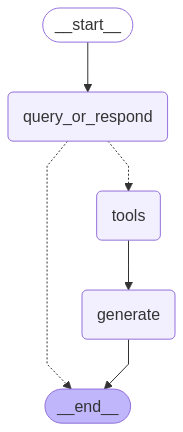

In [101]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

### Stateful management of chat history

To manage multiple conversational turns and threads, all we have to do is specify a [checkpointer](https://langchain-ai.github.io/langgraph/concepts/persistence/) when compiling our application. Because the nodes in our graph are appending messages to the state, we will retain a consistent chat history across invocations.

LangGraph comes with a simple in-memory checkpointer, which we use below. See its [documentation](https://langchain-ai.github.io/langgraph/concepts/persistence/) for more detail, including how to use different persistence backends (e.g., SQLite or Postgres).

For a detailed walkthrough of how to manage message history, head to the [How to add message history (memory)](/docs/how_to/message_history) guide.

In [102]:
# from langgraph.checkpoint.memory import MemorySaver

# memory = MemorySaver()
# graph = graph_builder.compile(checkpointer=memory)

# # Specify an ID for the thread
# config = {"configurable": {"thread_id": "abc12345"}}

We can now invoke similar to before:

In [103]:
# input_message = "ขอข้อมูล ที่พักใน กรุงเทพ(latitude: 13.7367, longitude: 100.5231) ระหว่างวันที่ 4/7/2025 - 5/7/2025"

# for step in graph.stream(
#     {"messages": [{"role": "user", "content": input_message}]},
#     stream_mode="values",
#     config=config,
# ):
#     step["messages"][-1].pretty_print()

In [104]:
# input_message = "ขอ latitude,longitude ของ Phuket"

# for step in graph.stream(
#     {"messages": [{"role": "user", "content": input_message}]},
#     stream_mode="values",
#     config=config,
# ):
#     step["messages"][-1].pretty_print()

In [105]:
# input_message = "ขอข้อมูล ที่พักใน กรุงเทพ ระหว่างวันที่ 4/7/2025 - 5/7/2025 100 คน ไม่มีเด็ก"

# for step in graph.stream(
#     {"messages": [{"role": "user", "content": input_message}]},
#     stream_mode="update",
#     config=config,
# ):
#     step["messages"][-1].pretty_print()

In [106]:
# input_message = "ต้องการห้องพักใน ภูเก็ต  วันที่ 10 พ.ค. ออก 11 พ.ค 10 คน ไม่มี เด็ก เท่าไหรก็ได้"

# for step in graph.stream(
#     {"messages": [{"role": "user", "content": input_message}]},
#     stream_mode="values",
#     config=config,
# ):
#     step["messages"][-1].pretty_print()

# Chat

In [107]:
from langgraph.checkpoint.memory import MemorySaver
import uuid
memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

# Specify an ID for the thread
thread_id = uuid.uuid1()
config = {"configurable": {"thread_id": thread_id}}

In [108]:
# print("Starting chat :",thread_id)
# while (True) :
#     input_message = input("ถามคำถาม  \n")
#     i = []
#     for step in graph.stream(
#         {"messages": [{"role": "user", "content": input_message}]},
#         stream_mode="values",
#         config=config,
#     ):
#         # step["messages"][-1].pretty_print()
#         i.append(step["messages"][-1])
#     i[-1].pretty_print()

# API

In [109]:
!pip install FastAPI pyngrok uvicorn

In [110]:
ngrok_token = user_secrets.get_secret("ngrok_token")
from pyngrok import ngrok, conf
conf.get_default().auth_token = ngrok_token

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio
from pyngrok import ngrok
import uvicorn

app = FastAPI()
nest_asyncio.apply()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # Allows all origins, adjust as needed
    allow_credentials=True,
    allow_methods=["*"],  # Allows all HTTP methods
    allow_headers=["*"],  # Allows all headers
)

class QueryRequest(BaseModel):
    query: str

@app.post("/ask")
async def ask(request: QueryRequest):
    input_message = request.query
    final_response = ""

    # Stream response and capture the last message
    for step in graph.stream(
        {"messages": [{"role": "user", "content": input_message}]},
        stream_mode="values",
        config=config,
    ):
        # Assuming HumanMessage object has a `content` attribute
        final_response = step["messages"][-1]
        final_response.pretty_print()
        # Use .content or the appropriate attribute
    return {"answer": final_response.content}

# Open an ngrok tunnel to the uvicorn app
public_url = ngrok.connect(8000)
print("FastAPI running at:", public_url)

# Start the server
uvicorn.run(app, port=8000)

FastAPI running at: NgrokTunnel: "https://bbc5-34-141-168-224.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [31]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     2403:6200:88a0:a2bd:6cfb:149a:c0e3:9d94:0 - "OPTIONS /ask HTTP/1.1" 200 OK
================================ Human Message =================================

How does the company use my personal information when I make a booking or use its services, according to the privacy notice?
================================== Ai Message ==================================
Tool Calls:
  retrieve_information (0d8f75e0-299f-4b98-815a-93a6dba1b657)
 Call ID: 0d8f75e0-299f-4b98-815a-93a6dba1b657
  Args:
    query: How does the company use my personal information when I make a booking or use its services, according to the privacy notice?


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 11
Content: จะจัดการกับข้อร้องเรียนโดยเร็วที่สุดโดยจะให้ความสำคัญกับข้อร้องเรียนที่ด่วนที่สุดเป็นอันดับแรก
ท่านสามารถช่วยให้เราช่วยเหลือท่านโดยเร็วที่สุดได้ เพียงให้ข้อมูลต่อไปนี้:
• หมายเลขยืนยันการจองของท่าน รหัส PIN ของ Booking.com ข้อมูลติดต่อของท่าน และอีเมลที่ท่านใช้
ทำการจองที่พัก
• สรุปสถานการณ์ที่ท่านต้องการความช่วยเหลือ รวมถึงวิธีที่ท่านต้องการให้เราช่วยท่าน
• เอกสารประกอบใด ๆ (ใบแจ้งยอดธนาคาร ภาพถ่าย ใบเสร็จ ฯลฯ)
ไม่ว่าจะเป็นปัญหาใดก็ตาม เราจะทำทุกสิ่งที่ทำได้เพื่อช่วยท่าน
• จะเกิดอะไรขึ้นหากการจองมีราคาผิดพลาด ในบางครั้ง (ซึ่งเป็นไปได้น้อยมาก) ท่านอาจเห็นราคาที่ไม่
ถูกต้องอย่างชัดเจนบนแพลตฟอร์มของเรา หากเกิดปัญหาดังกล่าวขึ้น และท่านทำการจองก่อนที่เราจะได้
แก้ไขข้อผิดพลาดนี้การจองของท่านก็อาจถูกยกเลิกและเราจะคืนเงินที่ท่านได้ชำระมา

Source: policy.pdf Page: 21
Content: 2. ไม่ว่าในกรณีใดก็ตาม บริการการเดินทางจะกลายเป็นส่วนหนึ่งของการจัดการ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 27
Content: บทบาทสำคัญ และความสำคัญของปัจจัยแต่ละปัจจัยอาจมีการเปลี่ยนแปลงได้โดยขึ้นอยู่กับคุณสมบัติของเที่ยวบิน
และวิธีที่ท่านและบุคคลอื่น ๆ ใช้แพลตฟอร์มของเรา
ตัวอย่างเช่น เราอาจให้น้ำหนักกับระยะเวลาการเดินทางในภาพรวม (มากกว่าที่เราให้กับจำนวนการแวะพัก) หากเรา
เห็นว่าสิ่งนี้ตอบสนองความต้องการของผู้เดินทางของเราได้มากกว่า
ท่านสามารถจัดเรียงผลการค้นหาด้วยวิธีอื่นได้หากต้องการ:
• ถูกที่สุด เที่ยวบินที่มีราคาต่ำกว่าจะปรากฏขึ้นมาก่อน
• เร็วที่สุด เที่ยวบินที่มีเวลาเดินทางสั้นกว่าจะปรากฏขึ้นมาก่อน
หากท่านเลือก “ถูกที่สุด” หรือ “เร็วที่สุด” ปัจจัยที่อธิบายไว้ใน “ดีที่สุด” จะยังคงส่งผลต่อสิ่งต่าง ๆ เช่น ปัจจัยเหล่านั้น
อาจทำหน้าที่เป็น “ตัวตัดสิน” ระหว่างเที่ยวบิน 2 รายการขึ้นไปที่อาจปรากฏในตำแหน่งเดียวกัน
ไม่ว่าท่านจะเลือกตัวเลือกการจัดเรียงแบบใด ท่านจะสามารถจำกัดผลการค้นหาของท่านให้แคบลงได้โดยใช้เกณฑ์
ค้นหา เช่น:
• จุดแวะพัก คลิกตัวเลือกเพื่อแจ้งให้เราท

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 15
Content: ระบบตัวเลือกแนะนำทั้งหมดที่เราใช้งานจะให้ตัวเลือกแนะนำโดยอิงกับปัจจัยหลักอย่างน้อย 1 ข้อดังต่อไปนี้:
• สิ่งที่ท่านบอกเราในแบบฟอร์มการค้นหา: จุดหมาย วันที่ ฯลฯ
• ข้อมูลใด ๆ ก็ตามที่เราได้รวบรวมซึ่งอิงจากวิธีที่ท่านโต้ตอบกับแพลตฟอร์มของเรา: การค้นหาครั้งก่อน ๆ ของ
ท่านบนแพลตฟอร์มของเรา ประเทศที่ท่านอยู่ในขณะที่ทำการค้นหา ฯลฯ
ในแต่ละกรณีปัจจัยแต่ละปัจจัยอาจจะมีความสำคัญมากขึ้นหรือน้อยลง โดยขึ้นอยู่กับว่าปัจจัยใดที่เราคิดว่ามีแนวโน้ม
มากที่สุดที่จะทำให้ได้รายการที่พักที่ท่านน่าจะต้องการจอง ทั้งหมดนี้ก็เพื่อให้ท่านค้นหาและจองสิ่งที่น่าสนใจได้อย่าง
ง่ายดายที่สุดเท่าที่เป็นไปได้
การจัดอันดับตั้งต้นและตัวเลือกการจัดเรียงของเรา
เมื่อท่านเห็นผลการค้นหาของท่านในตอนแรก ผลการค้นหาจะถูกจัดเรียง (“เรียงลำดับ”) ตาม “ตัวเลือกติดอันดับ” ซึ่ง
จะแนะนำสิ่งที่น่าสนใจโดยวิธีดังต่อไปนี้:
• บริการสิ่งที่น่าสนใจจะปรากฏขึ้นก่อนหากมีคนจำนวนมากคลิก (ในผลการค้นหา) จา

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 9
Content: กับข้อมูลส่วนบุคคลของท่านเพื่อให้สามารถเช็คอินออนไลน์กับผู้ให้บริการทริปได้หรือการดำเนินการกับข้อมูลส่วน
บุคคลที่เกี่ยวข้องกับเงินประกันความเสียหายที่อาจเกิดขึ้นอีกด้วย
นอกเหนือจากข้อมูลติดต่อของท่าน (เช่น อีเมลแอดเดรสและหมายเลขโทรศัพท์) เพื่อที่จะให้บริการแก่ท่าน เรายังอาจ
ต้องใช้ข้อมูลระบุการจองและวันที่เพื่อกำหนดระยะเวลาการจอง
B. บริการลูกค้าสัมพันธ์
เรามีบริการลูกค้าสัมพันธ์สำหรับผู้เดินทางทุกวันตลอด 24 ชั่วโมง โดยพร้อมให้ความช่วยเหลือในภาษาต่าง ๆ
มากกว่า 40 ภาษา การแชร์ข้อมูลการจองกับพนักงานฝ่ายบริการลูกค้าสัมพันธ์ของเราที่มีอยู่ทั่วโลกนั้นเป็นสิ่งจำเป็น
เพื่อให้เราสามารถให้ความช่วยเหลือท่านได้เมื่อท่านต้องการ ซึ่งรวมถึงช่วยให้ท่านติดต่อผู้ให้บริการทริปที่เหมาะสม
และตอบข้อซักถามใด ๆ ที่ท่านอาจมีเกี่ยวกับการจองทริป เป็นต้น
เพื่อให้ทำเช่นนี้ได้ เราจะใช้ข้อมูลส่วนบุคคล เช่น ข้อมูลการจองของท่าน อาทิราคาในการจองของ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 31
Content: ระบบตัวเลือกแนะนำที่เราใช้จะอ้างอิงตามปัจจัยหลักอันใดอันหนึ่งหรือทั้งสองปัจจัยดังต่อไปนี้:
• สิ่งที่ท่านบอกเราในแบบฟอร์มการค้นหา: จุดหมาย วันที่ ฯลฯ
• ผลการดำเนินงานของผู้ให้บริการด้านการเดินทางรายต่าง ๆ
ระดับความสำคัญของแต่ละปัจจัยเปลี่ยนแปลงได้ตลอดเวลา
เมื่อท่านค้นหาบนแพลตฟอร์มของเรา เราจะแสดงตัวเลือกที่เหมาะสมที่สุดขึ้นมาก่อน ซึ่งหมายความว่า:
• การเดินทางแบบส่วนตัว อันดับขึ้นอยู่กับราคาและตัวเลือกที่ดีที่สุดสำหรับขนาดกลุ่มของท่าน รวมถึงความ
พร้อมในการให้บริการ (ในสถานที่นั้น ณ เวลาที่ท่านต้องการ)
• รถไฟและรถประจำทาง เราแสดงผลการค้นหาที่ดีที่สุดสำหรับการเดินทางที่ท่านต้องการในช่วงเวลาที่ท่าน
ต้องการ
5F . รีวิว
หลังการเดินทาง จะมีการขอให้ท่านเขียนรีวิว ซึ่งภายหลังอาจมีการดำเนินการดังนี้:
• อัปโหลดไปยังแพลตฟอร์มของเราเพื่อช่วยให้ลูกค้ารายอื่นตัดสินใจเลือกได้อย่างเหมาะสม*
• ใช้เพื่อวัตถุประสงค์ทางการตลาด (บนแพลตฟอร์มของเรา บนโซเชียลมีเดีย

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 27
Content: บทบาทสำคัญ และความสำคัญของปัจจัยแต่ละปัจจัยอาจมีการเปลี่ยนแปลงได้โดยขึ้นอยู่กับคุณสมบัติของเที่ยวบิน
และวิธีที่ท่านและบุคคลอื่น ๆ ใช้แพลตฟอร์มของเรา
ตัวอย่างเช่น เราอาจให้น้ำหนักกับระยะเวลาการเดินทางในภาพรวม (มากกว่าที่เราให้กับจำนวนการแวะพัก) หากเรา
เห็นว่าสิ่งนี้ตอบสนองความต้องการของผู้เดินทางของเราได้มากกว่า
ท่านสามารถจัดเรียงผลการค้นหาด้วยวิธีอื่นได้หากต้องการ:
• ถูกที่สุด เที่ยวบินที่มีราคาต่ำกว่าจะปรากฏขึ้นมาก่อน
• เร็วที่สุด เที่ยวบินที่มีเวลาเดินทางสั้นกว่าจะปรากฏขึ้นมาก่อน
หากท่านเลือก “ถูกที่สุด” หรือ “เร็วที่สุด” ปัจจัยที่อธิบายไว้ใน “ดีที่สุด” จะยังคงส่งผลต่อสิ่งต่าง ๆ เช่น ปัจจัยเหล่านั้น
อาจทำหน้าที่เป็น “ตัวตัดสิน” ระหว่างเที่ยวบิน 2 รายการขึ้นไปที่อาจปรากฏในตำแหน่งเดียวกัน
ไม่ว่าท่านจะเลือกตัวเลือกการจัดเรียงแบบใด ท่านจะสามารถจำกัดผลการค้นหาของท่านให้แคบลงได้โดยใช้เกณฑ์
ค้นหา เช่น:
• จุดแวะพัก คลิกตัวเลือกเพื่อแจ้งให้เราท

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 49
Content: ชั่วโมงก่อนที่ท่านจะไปถึงสถานที่นัดรับ
“การเดินทางด้วยการขนส่งแบบส่วนตัว” หมายถึง การเดินทางด้วยการขนส่งแบบส่วนตัวตามที่ระบุไว้ใน
การจอง (รวมถึงการเปลี่ยนแปลงใด ๆ ภายหลังจากที่ทำการจอง)
“การขนส่งแบบสาธารณะ” หมายถึง รถไฟ รถประจำทาง รถราง และระบบขนส่งสาธารณะประเภทอื่น ๆ
“การเดินทางด้วยการขนส่งแบบสาธารณะ” หมายถึง การเดินทางด้วยการขนส่งแบบสาธารณะตามที่ระบุไว้
ในการจอง (รวมถึงการเปลี่ยนแปลงใด ๆ ภายหลังจากที่ทำการจอง)
“การเช่า” (หรือ “บริการรถเช่า”) หมายถึง การให้บริการรถเช่าโดยผู้ให้บริการ (ตลอดทั้งส่วน D “ผู้
ให้บริการ” หมายถึง บริษัทรถเช่าที่ให้บริการรถเช่า)
“ข้อตกลงการเช่า” หมายถึง สัญญาระหว่างท่านและผู้ให้บริการ ซึ่งท่านลงนามเมื่อมีการรับรถ ท่านจะได้รับ
ข้อมูลสรุปเกี่ยวกับข้อกำหนดสำคัญ ๆ ในระหว่างขั้นตอนการจอง
“สมนาคุณ” หมายถึง สิทธิประโยชน์ที่ท่านจะได้รับตามสัญญา ในกรณีส่วนใหญ่สมนาคุณจะเป็นเครดิต
ด้านการเดินทาง เครดิตเงินสด แคชแบ็คทางบัตรเครด

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 43
Content: เนื่องจากไม่มี
ตัวเลือก
บางอย่าง)
ท่านสามารถ
ใช้สิทธิของ
เจ้าของข้อมูล
ที่กล่าวถึงใน
แถลงการณ์นี้
ได้โดยติดต่อ
ทีมงานด้าน
ความเป็น
ส่วนตัวของ
เรา (ซึ่งรวมถึง
เจ้าหน้าที่
คุ้มครอง
ข้อมูล) ผ่าน
ทางอีเมล
แอดเดรสที่
ระบุไว้ใน
หัวข้อบริษัท
ของเราและ
วิธีที่เราปฏิบัติ
ตามกฎหมาย
ความเป็น
ส่วนตัว ท่าน
สามารถ

Source: policy.pdf Page: 3
Content: • A9. ความเป็นส่วนตัวและคุกกี้
• A10. คำขอในการเข้าถึง
• A11. ประกันภัย
• A12. Genius
• A13. สมนาคุณ เครดิต และ Wallet
• A14. สิทธิในทรัพย์สินทางปัญญา
• A15. กรณีที่มีข้อติดขัดบางประการ
• A16. การสื่อสารกับผู้ให้บริการ
• A17. มาตรการต่อพฤติกรรมที่ไม่สามารถยอมรับได้
• A18. ข้อจำกัดของความรับผิด
• A19. กฎหมายที่ใช้บังคับและศาลที่มีอำนาจพิจารณาคดี
• A20. การจัดการการเดินทางแบบเชื่อมโยงกัน
• A21. ข้อสำหรับการแก้ไขดัดแปลง
A1. คำนิยาม
1. คำบางคาที่ท่านจะได้เห็นนั้นมีความหมายเฉพาะเจาะจงมา

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 21
Content: 2. ไม่ว่าในกรณีใดก็ตาม บริการการเดินทางจะกลายเป็นส่วนหนึ่งของการจัดการการเดินทางแบบเชื่อมโยง
กัน ไม่ใช่แพ็กเกจ ในกรณีดังกล่าว Booking.com มีการคุ้มครองตามที่กฎหมายของสหภาพยุโรปและส
หราชอาณาจักรกำหนดไว้ซึ่งจะคืนเงินที่ท่านชำระให้กับ Booking.com สำหรับบริการที่ไม่ได้ดำเนินการ
เนื่องจาก Booking.com ตกอยู่ในภาวะหนี้สินล้นพ้นตัว โปรดทราบว่าการคุ้มครองนี้จะไม่คืนเงินในกรณี
ที่ผู้ให้บริการที่เกี่ยวข้องตกอยู่ในภาวะหนี้สินล้นพ้นตัว
3. Booking.com ได้ขยายการคุ้มครองในภาวะหนี้สินล้นพ้นตัวนี้โดยสมัครใจให้ครอบคลุมลูกค้าที่อยู่
นอกสหภาพยุโรปและสหราชอาณาจักร ซึ่งได้จองบริการการเดินทางหลายรายการผ่าน Booking.com ซึ่ง
เป็นการจัดการการเดินทางแบบเชื่อมโยงกันตามความหมายของข้อกำหนดการเดินทางแบบแพ็กเกจ โดย
การขยายนี้จะมีผลเฉพาะกับการชำระเงินที่ Booking.com เป็นผู้ได้รับเท่านั้น
4. Booking.com ได้ดำเนินการคุ้มครองในภาวะหนี้สินล้นพ้นตัวโดยใช้หนังสือค้ำประกันของธนาคาร

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 2
Content: ข้อสรุปนี้ไม่ได้เป็นส่วนหนึ่งของข้อกำหนดของเรา หรือเอกสารทางกฎหมาย แต่เป็นเพียงคำอธิบายง่าย ๆ
เกี่ยวกับข้อกำหนดของเรา เราขอแนะนำให้ท่านอ่านเอกสารแต่ละฉบับอย่างครบถ้วน คำบางคำในข้อสรุป
นี้มีความหมายเฉพาะเจาะจงอย่างมาก ดังนั้นโปรดตรวจสอบ “พจนานุกรม Booking.com” ที่ส่วนท้าย
ของข้อกำหนดฉบับนี้
สารบัญ
• A. ผลิตภัณฑ์ด้านการเดินทางทั้งหมด
• B. ที่พัก
• C. สิ่งที่น่าสนใจ
• D. บริการรถเช่า
• E. เที่ยวบิน
• F . การขนส่งแบบส่วนตัวและแบบสาธารณะ
• พจนานุกรม Booking.com
• ข้อกำหนดในการให้บริการที่ใช้ก่อนหน้านี้
A. ผลิตภัณฑ์ด้านการเดินทางทั้งหมด
• A1. คำนิยาม
• A2. เกี่ยวกับข้อกำหนดฉบับนี้
• A3. เกี่ยวกับ Booking.com
• A4. แพลตฟอร์มของเรา
• A5. ค่านิยมของเรา
• A6. ราคา
• A7. การชำระเงิน
• A8. นโยบาย

Source: policy.pdf Page: 34
Content: E. เที่ยวบิน
• E1. ขอบเขตของส่วนนี้
• E2. ความสัมพันธ์ซึ่งผูกพันโดยสัญญา
• E3. สิ่งที่เราจะทำ
• E4. สิ่งที่ท่านต้องทำ
• E5.

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: digital_services_act .pdf Page: 2
Content: เว็บไซต์หรือแอปบุคคลที่สามที่ต้องการรับข้อมูลของผู้เดินทางจะต้องลงทะเบียนกับ Booking.com ก่อน
เพื่อช่วยให้แน่ใจว่าจะมีการใช้แนวทางปฏิบัติที่ดีที่สุดที่เหมาะสมในด้านความเป็นส่วนตัวและความ
ปลอดภัย
Beyond addressing DMA requirements, we also make the Data Portability API available
to Booking.com travellers located in the United Kingdom (UK). Travellers located in the
UK can follow the same process as explained above.
III. คำติชม
หากมีคำติชมใด ๆ เกี่ยวกับการปฏิบัติตามกฎหมายตลาดดิจิตอล (DMA) ของเรา โปรดใช้แบบฟอร์มเว็บ
ใน “ศูนย์แก้ไขข้อร้องเรียน” และเลือกหัวข้อ DMA ที่เกี่ยวข้อง คู่คำควรไปที่ส่วนของคู่คำ ส่วนผู้เดินทาง
และบุคคลอื่น ๆ ที่สนใจควรใช้ส่วนของลูกค้าเพื่อส่งคำติชม

Source: privacy_notice_and_cookie_statement.pdf Page: 43
Content: เนื่องจากไม่มี
ตัวเลือก
บางอย่าง)
ท่านสามารถ
ใช้สิทธิของ
เจ้าของข้อมูล
ที่กล่าวถึงใน
แถลงการณ์นี

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 2
Content: ข้อสรุปนี้ไม่ได้เป็นส่วนหนึ่งของข้อกำหนดของเรา หรือเอกสารทางกฎหมาย แต่เป็นเพียงคำอธิบายง่าย ๆ
เกี่ยวกับข้อกำหนดของเรา เราขอแนะนำให้ท่านอ่านเอกสารแต่ละฉบับอย่างครบถ้วน คำบางคำในข้อสรุป
นี้มีความหมายเฉพาะเจาะจงอย่างมาก ดังนั้นโปรดตรวจสอบ “พจนานุกรม Booking.com” ที่ส่วนท้าย
ของข้อกำหนดฉบับนี้
สารบัญ
• A. ผลิตภัณฑ์ด้านการเดินทางทั้งหมด
• B. ที่พัก
• C. สิ่งที่น่าสนใจ
• D. บริการรถเช่า
• E. เที่ยวบิน
• F . การขนส่งแบบส่วนตัวและแบบสาธารณะ
• พจนานุกรม Booking.com
• ข้อกำหนดในการให้บริการที่ใช้ก่อนหน้านี้
A. ผลิตภัณฑ์ด้านการเดินทางทั้งหมด
• A1. คำนิยาม
• A2. เกี่ยวกับข้อกำหนดฉบับนี้
• A3. เกี่ยวกับ Booking.com
• A4. แพลตฟอร์มของเรา
• A5. ค่านิยมของเรา
• A6. ราคา
• A7. การชำระเงิน
• A8. นโยบาย

Source: privacy_notice_and_cookie_statement.pdf Page: 18
Content: วัตถุประสงค์ของการ
ดำเนินการกับข้อมูล
ส่วนบุคคล
ฐานทางกฎหมายและหมายเหตุ
ข้อมูลอื่น ๆ ที่เกี่ยว

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 11
Content: จะจัดการกับข้อร้องเรียนโดยเร็วที่สุดโดยจะให้ความสำคัญกับข้อร้องเรียนที่ด่วนที่สุดเป็นอันดับแรก
ท่านสามารถช่วยให้เราช่วยเหลือท่านโดยเร็วที่สุดได้ เพียงให้ข้อมูลต่อไปนี้:
• หมายเลขยืนยันการจองของท่าน รหัส PIN ของ Booking.com ข้อมูลติดต่อของท่าน และอีเมลที่ท่านใช้
ทำการจองที่พัก
• สรุปสถานการณ์ที่ท่านต้องการความช่วยเหลือ รวมถึงวิธีที่ท่านต้องการให้เราช่วยท่าน
• เอกสารประกอบใด ๆ (ใบแจ้งยอดธนาคาร ภาพถ่าย ใบเสร็จ ฯลฯ)
ไม่ว่าจะเป็นปัญหาใดก็ตาม เราจะทำทุกสิ่งที่ทำได้เพื่อช่วยท่าน
• จะเกิดอะไรขึ้นหากการจองมีราคาผิดพลาด ในบางครั้ง (ซึ่งเป็นไปได้น้อยมาก) ท่านอาจเห็นราคาที่ไม่
ถูกต้องอย่างชัดเจนบนแพลตฟอร์มของเรา หากเกิดปัญหาดังกล่าวขึ้น และท่านทำการจองก่อนที่เราจะได้
แก้ไขข้อผิดพลาดนี้การจองของท่านก็อาจถูกยกเลิกและเราจะคืนเงินที่ท่านได้ชำระมา

Source: policy.pdf Page: 12
Content: (กรณีที่มีการกล่าวหา) การฉ้อโกงหรือการใช้งานในทางที่ผิด
สมนาคุณ: การมี

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 49
Content: ชั่วโมงก่อนที่ท่านจะไปถึงสถานที่นัดรับ
“การเดินทางด้วยการขนส่งแบบส่วนตัว” หมายถึง การเดินทางด้วยการขนส่งแบบส่วนตัวตามที่ระบุไว้ใน
การจอง (รวมถึงการเปลี่ยนแปลงใด ๆ ภายหลังจากที่ทำการจอง)
“การขนส่งแบบสาธารณะ” หมายถึง รถไฟ รถประจำทาง รถราง และระบบขนส่งสาธารณะประเภทอื่น ๆ
“การเดินทางด้วยการขนส่งแบบสาธารณะ” หมายถึง การเดินทางด้วยการขนส่งแบบสาธารณะตามที่ระบุไว้
ในการจอง (รวมถึงการเปลี่ยนแปลงใด ๆ ภายหลังจากที่ทำการจอง)
“การเช่า” (หรือ “บริการรถเช่า”) หมายถึง การให้บริการรถเช่าโดยผู้ให้บริการ (ตลอดทั้งส่วน D “ผู้
ให้บริการ” หมายถึง บริษัทรถเช่าที่ให้บริการรถเช่า)
“ข้อตกลงการเช่า” หมายถึง สัญญาระหว่างท่านและผู้ให้บริการ ซึ่งท่านลงนามเมื่อมีการรับรถ ท่านจะได้รับ
ข้อมูลสรุปเกี่ยวกับข้อกำหนดสำคัญ ๆ ในระหว่างขั้นตอนการจอง
“สมนาคุณ” หมายถึง สิทธิประโยชน์ที่ท่านจะได้รับตามสัญญา ในกรณีส่วนใหญ่สมนาคุณจะเป็นเครดิต
ด้านการเดินทาง เครดิตเงินสด แคชแบ็คทางบัตรเครด

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 6
Content: ซึ่งเป็นเจ้าของข้อมูลส่วนบุคคลที่ท่านแจ้งนั้นรับทราบแล้วว่าท่านได้ดำเนินการดังกล่าว รวมถึงเข้าใจแล้วว่า
Booking.com จะนำข้อมูลส่วนบุคคลดังกล่าวไปใช้อย่างไร (ตามที่อธิบายไว้ในแถลงการณ์ความเป็นส่วนตัวนี้)
ข้อมูลส่วนบุคคลที่เรารวบรวมโดยอัตโนมัติ
ไม่ว่าท่านจะทำหรือไม่ได้ทำการจองทริปก็ตาม เราจะรวบรวมข้อมูลบางอย่างโดยอัตโนมัติเมื่อท่านใช้เว็บไซต์หรือแอ
ปมือถือของเรา ซึ่งรวมถึง IP แอดเดรส วันที่และเวลาที่ท่านใช้แพลตฟอร์มของเรา และข้อมูลเกี่ยวกับฮาร์ดแวร์และ

Source: policy.pdf Page: 3
Content: • A9. ความเป็นส่วนตัวและคุกกี้
• A10. คำขอในการเข้าถึง
• A11. ประกันภัย
• A12. Genius
• A13. สมนาคุณ เครดิต และ Wallet
• A14. สิทธิในทรัพย์สินทางปัญญา
• A15. กรณีที่มีข้อติดขัดบางประการ
• A16. การสื่อสารกับผู้ให้บริการ
• A17. มาตรการต่อพฤติกรรมที่ไม่สามารถยอมรับได้
• A18. ข้อจำกัดของความรับผิด
• A19. กฎหมายที่ใช้บังคับและศาลที่มีอำน

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 7
Content: ซอฟต์แวร์ของอุปกรณ์ของท่านตามที่เราเลือก (เช่น ประเภทของระบบปฏิบัติการ อินเทอร์เน็ตเบราว์เซอร์ และเวอร์ชั่น
ของแอปมือถือที่ท่านใช้รวมถึงการตั้งค่าภาษาที่ท่านเลือก) เมื่อเว็บไซต์หรือแอปมือถือของบุคคลที่สามนำทางท่าน
มายังเว็บไซต์หรือแอปมือถือของ Booking.com เราจะรวบรวมข้อมูลนี้ด้วยเช่นกัน นอกจากนี้ เรายังรวบรวมข้อมูล
เกี่ยวกับการคลิกและหน้าที่แสดงให้ท่านเห็นจากแพลตฟอร์มของเรา โดยอาศัยคุกกี้ที่เราปล่อยไว้ เป็นต้น
เมื่อท่านใช้แอปมือถือของเรา เราจะรวบรวมข้อมูลที่บ่งชี้ถึงอุปกรณ์พกพาเครื่องนั้น รวมทั้งข้อมูลเกี่ยวกับการ
ปฏิบัติการ (รวมถึงการหยุดทำงานที่อาจเกิดขึ้น) ของแอปบนอุปกรณ์เครื่องนั้น
ข้อมูลส่วนบุคคลที่เราได้รับจากแหล่งข้อมูลอื่น ๆ
เราอาจได้รับข้อมูลเกี่ยวกับท่านจากแหล่งข้อมูลอื่น ๆ ด้วยเช่นกัน ซึ่งอาจรวมถึงแหล่งข้อมูลอย่างน้อย 1 แหล่ง
ดังต่อไปนี้:
• บริษัทอื่น ๆ ของ BHI
• ผู้ให้บริการทริป เช่น เป็นส่วนหนึ่งของการ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 17
Content: ในการดำเนินการกับข้อมูลส่วนบุคคลของท่านตามที่ระบุไว้ข้างต้น Booking.com จะอาศัยฐานทางกฎหมายหลาย
ประการที่กำหนดไว้ในข้อบังคับด้านความเป็นส่วนตัวที่เกี่ยวข้อง ซึ่งสรุปได้ดังนี้:
วัตถุประสงค์ของการ
ดำเนินการกับข้อมูล
ส่วนบุคคล
ฐานทางกฎหมายและหมายเหตุ
A - การจองทริป
B - บริการลูกค้าสัมพันธ์
Booking.com จะอาศัยฐานทางกฎหมายที่ระบุว่าการดำเนินการกับข้อมูลส่วนบุคคล
จำเป็นต่อการดำเนินการตามที่ระบุไว้ในสัญญาที่เกี่ยวข้องกับท่าน โดยเฉพาะอย่างยิ่งเพื่อ
ดูแลจัดการและทำให้การจองทริปของท่านเสร็จสมบูรณ์
หากไม่มีการให้ข้อมูลส่วนบุคคลที่จำเป็น ทาง Booking.com จะไม่สามารถดำเนินการ
จองทริปกับผู้ให้บริการทริปให้เสร็จสมบูรณ์ได้รวมถึงไม่สามารถให้บริการลูกค้าสัมพันธ์แก่
ท่านสำหรับการจองดังกล่าวด้วยเช่นกัน
C. แอคเคาท์ผู้ใช้
D. กิจกรรมการตลาด
E. การสื่อสารกับท่าน
F . การสำรวจตลาด
G. การพัฒนาบริการ
ของเรา
H. การแสดงราคา
สำหรับท่าน
I. รีวิวจ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 41
Content: เคาท์ของ
ท่าน
เข้าถึงข้อมูล
ส่วนบุคคล
มากมายของ
ท่านได้ผ่าน
เว็บไซต์หรือ
แอปมือถือ
ของเรา โดย
ปกติแล้ว
ท่านจะเห็น
ตัวเลือกให้
เพิ่ม อัปเดต
หรือลบข้อมูล
ที่เรามีอยู่
เกี่ยวกับท่าน
ในการตั้งค่า
แอคเคาท์ผู้ใช้
ใช้
แบบฟอร์ม
คำร้อง
จาก
เจ้าของ
ข้อมูลของ
เรา
หากท่านไม่
สามารถ
ดำเนินการ
ผ่านเว็บไซต์
หรือแอปมือ
ถือของเราได้
(เช่น
เนื่องจาก
ข้อมูลส่วน
บุคคล

Source: privacy_notice_and_cookie_statement.pdf Page: 6
Content: ซึ่งเป็นเจ้าของข้อมูลส่วนบุคคลที่ท่านแจ้งนั้นรับทราบแล้วว่าท่านได้ดำเนินการดังกล่าว รวมถึงเข้าใจแล้วว่า
Booking.com จะนำข้อมูลส่วนบุคคลดังกล่าวไปใช้อย่างไร (ตามที่อธิบายไว้ในแถลงการณ์ความเป็นส่วนตัวนี้)
ข้อมูลส่วนบุคคลที่เรารวบรวมโดยอัตโนมัติ
ไม่ว่าท่านจะทำหรือไม่ได้ทำการจองทริปก็ตาม เราจะรวบรวมข้อมูลบางอย่างโดยอัตโนมัติเมื่อท่านใช้เว็บไซต์หรือแอ
ปมือถือของเรา ซึ่งรวมถึง IP แอดเดรส วันที่และเวลาที่ท่านใช้

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 18
Content: วัตถุประสงค์ของการ
ดำเนินการกับข้อมูล
ส่วนบุคคล
ฐานทางกฎหมายและหมายเหตุ
ข้อมูลอื่น ๆ ที่เกี่ยวข้อง
กับจุดหมาย
J. การตรวจสอบสาย
เรียกเข้าจากลูกค้า
K. การส่งเสริมบริการที่
ปลอดภัยและเชื่อถือได้
และการป้องกันการ
ทุจริต
อย่างชัดแจ้งโดยบุคคลใดบุคคลหนึ่ง หรือจะอาศัยฐานทางกฎหมายอื่น ๆ ตามที่เราอาจทำ
การประเมิน ณ เวลานั้น
L. วัตถุประสงค์ด้าน
กฎหมาย
นอกจากนี้ Booking.com ยังจะอาศัย (หากเป็นไปได้) การปฏิบัติตามข้อผูกพันทาง
กฎหมาย (เช่น คำขอที่ชอบด้วยกฎหมายจากผู้บังคับใช้กฎหมาย)
วัตถุประสงค์ทุกประเภท
สุดท้าย หากกฎหมายที่บังคับใช้ที่มีการพัฒนาไปอย่างต่อเนื่องกำหนดไว้ Booking.com
จะขอความยินยอมจากท่านก่อนดำเนินการกับข้อมูลส่วนบุคคลของท่าน รวมถึงเพื่อ
วัตถุประสงค์ทางการตลาดทางตรงหรือในกรณีที่กฎหมายกำหนดไว้เป็นอย่างอื่น
หากท่านต้องการคัดค้านการดำเนินการตามที่กำหนดไว้ในข้อ C ไปจนถึง L และไม่มีกลไกให้ท่านเลือกขอถอนตัว
โดยตรง (เช่น

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 16
Content: ตรวจจับการประพฤติไม่เหมาะสมรูปแบบอื่นใดตามที่อธิบายไว้ในหัวข้อวิธีที่เราใช้ปัญญาประดิษฐ์ (AI) และทำการ
ตัดสินใจด้วยระบบอัตโนมัติ
L. วัตถุประสงค์ด้านกฎหมาย
ในบางกรณี เราอาจจำเป็นต้องนำข้อมูลของท่านกลับมาใช้เพื่อ:
• จัดการและแก้ไขข้อเรียกร้องและข้อพิพาททางกฎหมาย
• รับมือกับการสืบสวนตามข้อบังคับที่อาจเกิดขึ้น
• บังคับใช้ข้อกำหนดในการให้บริการการจองออนไลน์ของเรา
• ปฏิบัติตามคำขอทางกฎหมายจากผู้บังคับใช้กฎหมาย
• ปฏิบัติตามกฎหมายและข้อบังคับที่มีผลบังคับใช้ในกรณีของ Booking.com
ตัวอย่างเช่น เราอาจต้องดำเนินการกับประวัติการจองของท่าน ข้อมูลของการจองดังกล่าว 1 รายการหรือมากกว่านั้น
และข้อมูลการชำระเงินที่เกี่ยวข้อง
ฐานทางกฎหมายสำหรับการดำเนินการกับข้อมูลส่วนบุคคล

Source: privacy_notice_and_cookie_statement.pdf Page: 10
Content: หรือการแจ้งเตือนบนแพลตฟอร์ม) จาก Booking.com ซึ่งข้อความดังกล่าวรวมถึงโปรโมชั่น สมนาคุณ
Genius 

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 1
Content: ข้อมูลทั้งหมดนี้มีความสำคัญเนื่องจากข้อมูลดังกล่าว (พร้อมด้วยอีเมลยืนยันการจองของท่าน และข้อมูล
ก่อนทำสัญญาใด ๆ ที่ให้ไว้ก่อนที่ท่านจอง) จะกำหนดข้อกำหนดทางกฎหมายของการที่ผู้ให้บริการเสนอ
ผลิตภัณฑ์ด้านการเดินทางผ่านแพลตฟอร์มของเรา
หากมีสิ่งผิดปกติเกิดขึ้นกับผลิตภัณฑ์ด้านการเดินทางของท่าน ส่วน A15 ของข้อกำหนดฉบับนี้จะอธิบาย
สิ่งที่ท่านสามารถทำได้ซึ่งรวมถึงการร้องเรียนถึงเรา การขึ้นศาล และ (ในบางกรณี) การใช้บริการการระงับ
ข้อพิพาททางออนไลน์
หากท่านต้องการยื่นคำขอทบทวนผลการตัดสินในการกลั่นกรองเนื้อหา หรือต้องการรายงานเนื้อหาใด ๆ
บนแพลตฟอร์มของเรา แนวทางและมาตรฐานด้านเนื้อหาของเราจะอธิบายวิธีดำเนินการดังกล่าว รวมถึง
วิธีการที่เราจัดการคำขอเหล่านี้

Source: privacy_notice_and_cookie_statement.pdf Page: 41
Content: เคาท์ของ
ท่าน
เข้าถึงข้อมูล
ส่วนบุคคล
มากมายของ
ท่านได้ผ่าน
เว็บไซต์หรือ
แอปมือถือ
ของเรา โดย
ปกติแล้ว
ท่านจะเห็น
ตัวเลือกให้
เพิ่ม อัปเด

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 42
Content: บางอย่างที่
เรามีเกี่ยวกับ
ท่านไม่
สามารถ
เข้าถึงทาง
ออนไลน์ได้)
ท่านสามารถ
ส่งคำขอให้
เราได้ง่าย ๆ
ผ่าน
แบบฟอร์มคำ
ร้องจาก
เจ้าของข้อมูล
นี้
ทางอีเมล
หากท่านไม่
สามารถ
ดำเนินการ
โดยตรงจาก
แอคเคาท์ผู้ใช้
ของท่านหรือ
โดยใช้
แบบฟอร์มคำ
ร้องจาก
เจ้าของข้อมูล
ของเราได้
(เช่น

Source: privacy_notice_and_cookie_statement.pdf Page: 27
Content: ประโยชน์ท่านอื่น ๆ หรือข้อมูลเกี่ยวกับการเคลม (“ข้อมูลเฉพาะด้านประกันภัย”)
• หากท่านทำการเคลมภายใต้กรมธรรม์ประกันภัย การเคลมดังกล่าวอาจดูแลโดยผู้รับประกันภัยโดยตรง
เท่ากับว่าอาจมีการขอให้ท่านระบุข้อมูลส่วนบุคคลเพื่อที่จะส่งการเคลมถึงผู้รับประกันภัยโดยตรง โดยผู้รับ
ประกันภัยจะแจ้งให้ท่านทราบเมื่อถึงขั้นตอนที่ต้องรวบรวมข้อมูลของท่าน เมื่อการเคลมของท่านดูแลโดย
ผู้รับประกันภัย เราอาจได้รับข้อมูลเกี่ยวกับสถานะของการเคลมเพื่อให้สามารถจัดสรรบริการลูกค้าสัมพันธ์
แก่ท่านได้
หากต้องการข้อมูล

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 18
Content: วัตถุประสงค์ของการ
ดำเนินการกับข้อมูล
ส่วนบุคคล
ฐานทางกฎหมายและหมายเหตุ
ข้อมูลอื่น ๆ ที่เกี่ยวข้อง
กับจุดหมาย
J. การตรวจสอบสาย
เรียกเข้าจากลูกค้า
K. การส่งเสริมบริการที่
ปลอดภัยและเชื่อถือได้
และการป้องกันการ
ทุจริต
อย่างชัดแจ้งโดยบุคคลใดบุคคลหนึ่ง หรือจะอาศัยฐานทางกฎหมายอื่น ๆ ตามที่เราอาจทำ
การประเมิน ณ เวลานั้น
L. วัตถุประสงค์ด้าน
กฎหมาย
นอกจากนี้ Booking.com ยังจะอาศัย (หากเป็นไปได้) การปฏิบัติตามข้อผูกพันทาง
กฎหมาย (เช่น คำขอที่ชอบด้วยกฎหมายจากผู้บังคับใช้กฎหมาย)
วัตถุประสงค์ทุกประเภท
สุดท้าย หากกฎหมายที่บังคับใช้ที่มีการพัฒนาไปอย่างต่อเนื่องกำหนดไว้ Booking.com
จะขอความยินยอมจากท่านก่อนดำเนินการกับข้อมูลส่วนบุคคลของท่าน รวมถึงเพื่อ
วัตถุประสงค์ทางการตลาดทางตรงหรือในกรณีที่กฎหมายกำหนดไว้เป็นอย่างอื่น
หากท่านต้องการคัดค้านการดำเนินการตามที่กำหนดไว้ในข้อ C ไปจนถึง L และไม่มีกลไกให้ท่านเลือกขอถอนตัว
โดยตรง (เช่น

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 20
Content: เช่น เพื่อเตรียมพร้อมสำหรับผู้เข้าพักที่มาถึงและผู้เข้าพักที่กำลังจะออกเดินทาง นอกจากนี้ผู้ให้บริการทริปยังอาจขอ
ข้อมูลส่วนบุคคลเพิ่มเติม เช่น เพื่อให้บริการเพิ่มเติมหรือเพื่อปฏิบัติตามสิ่งที่ท้องถิ่นกำหนดไว้และข้อกำหนดในท้องถิ่น
โปรดอ่านแถลงการณ์ความเป็นส่วนตัวของผู้ให้บริการทริป (หากมี) เพื่อทำความเข้าใจว่าผู้ให้บริการจะดำเนินการกับ
ข้อมูลส่วนบุคคลของท่านอย่างไรบ้าง

Source: privacy_notice_and_cookie_statement.pdf Page: 29
Content: เป็นอันตรายต่อผู้เดินทาง เราจะดำเนินการตอบโต้อย่างรวดเร็ว เช่น การระงับแอคเคาท์ผู้ใช้ที่มีความเสี่ยง
และการแจ้งเตือนผู้ใช้แอคเคาท์
3. อ่าน (และปฏิบัติตามคำแนะนำจาก) บทความเกี่ยวกับการป้องกันการทุจริตทางออนไลน์และการคุ้มครอง
ข้อมูลที่เราอาจเปิดเผยให้แก่ผู้เดินทางและคู่คำ โดยทั่วไปแล้ว ความพยายามทำการทุจริตทางออนไลน์มัก
เกี่ยวข้องกับวิศวกรรมสังคมและแผนการ “ฟิชชิ่ง” ซึ่งมิจฉาชีพอาจปลอมตั

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 27
Content: โปรดตรวจสอบข้อมูลที่ระบุไว้ในขั้นตอนการจองเพื่อดูข้อมูลเพิ่มเติมเกี่ยวกับเราและฝ่ายต่าง ๆ ที่ทำงานร่วมกับเรา
เพื่อเสนอผลิตภัณฑ์และบริการเหล่านี้แก่ท่าน รายละเอียดของผู้รับประกันภัยจะปรากฏในกรมธรรม์ประกันภัยและ
เอกสารที่เกี่ยวข้องที่ท่านได้รับ
เมื่อมีการเสนอประกันภัย เราอาจต้องใช้และแชร์ข้อมูลส่วนบุคคลที่เกี่ยวข้องกับผลิตภัณฑ์ประกันภัยดังกล่าว โดย
ข้อมูลนี้เกี่ยวข้องกับท่านในฐานะผู้ถือกรมธรรม์ในปัจจุบันหรือในอนาคต ผู้รับประโยชน์ตามที่ระบุในกรมธรรม์ สมาชิก
ในครอบครัว ผู้เคลม และฝ่ายอื่น ๆ ที่เกี่ยวข้องในการเคลม:
• เราอาจต้องแชร์ข้อมูลส่วนบุคคลบางอย่างที่ได้รับในระหว่างขั้นตอนการจอง (“ข้อมูลคำสั่งซื้อทั่วไป”) ภายใน
บริษัทอื่น ๆ ของ Booking.com เพื่อมอบข้อเสนอ จัดเตรียมความคุ้มครองประกันภัย และดูแลการเคลม
ประกันภัย นอกจากนี้อาจมีการขอให้ท่านระบุข้อมูลเพิ่มเติม เช่น ชื่อของสมาชิกในครอบครัวหรือผู้รับ
ประโยชน์ท่านอื่น ๆ 

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 20
Content: อย่างไรก็ตาม ผู้ให้บริการอาจเสนอผลิตภัณฑ์ด้านการเดินทางนอกแพลตฟอร์มของเราเช่นกัน (ดังนั้นสิ่งที่ผู้ให้บริการ
เสนอบนแพลตฟอร์มของเราอาจไม่ครบถ้วนสมบูรณ์)
เรามีกระทั่งทีมงานผู้เชี่ยวชาญที่ไปเยี่ยมชมบริษัทรถเช่าก่อนที่บริษัทดังกล่าวจะปรากฏบนแพลตฟอร์มของเรา
ผู้ให้บริการทั้งหมดบนแพลตฟอร์มของเราเป็นผู้ประกอบการมืออาชีพ
3D. เราสร้างรายได้อย่างไร
เราสร้างรายได้เมื่อเราหาบริการรถเช่าให้ท่านได้ โดยวิธีสร้างรายได้ของเรามีสองวิธี:
• เรารับค่าคอมมิชชั่นจากบริษัทรถเช่าสำหรับบริการของเรา หรือ
• เราตกลงเรื่องราคาสุทธิกับบริษัทรถเช่าและใช้การบวกเพิ่มของเราเอง
ไม่ว่าในกรณีใด เรามุ่งมั่นที่จะเสนอทางเลือกมากมายให้แก่ลูกค้าในราคาที่ดีนอกจากนี้ แพลตฟอร์มของเรายังให้ท่าน
ใช้งานได้ฟรี
3E. ระบบตัวเลือกแนะนำของเรา
วิธีที่ Booking.com ใช้งานระบบตัวเลือกแนะนำ

Source: privacy_notice_and_cookie_statement.pdf Page: 10
Content: หรือการแจ้งเตือนบนแพลตฟอร์ม) จาก Booking.

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 12
Content: • เราเคยลบผู้ให้บริการออกจากแพลตฟอร์มของเราอย่างสิ้นเชิงหรือไม่ แน่นอน เราสามารถทำได้หาก
พบว่าผู้ให้บริการไม่ปฏิบัติตามภาระผูกพันภายใต้สัญญา หรือให้คำอธิบายที่ไม่ถูกต้องเกี่ยวกับที่พัก (และไม่
แก้ไขให้ถูกต้องเมื่อเราขอให้ดำเนินการ) เป็นต้น
สำหรับข้อมูลเพิ่มเติม โปรดดูที่ “ควรทำอย่างไรหากเกิดความผิดพลาด” (A15) และ “กฎหมายที่บังคับใช้และศาลที่มี
อำนาจพิจารณาคดี” (A19) ในข้อกำหนดในการให้บริการของเรา
1L. การจองเกินจำนวนจัดสรร
เมื่อการจองของท่านได้รับการยืนยัน ผู้ให้บริการของท่านต้องให้บริการการจองดังกล่าว หากผู้ให้บริการมีการ “จอง
เกินจำนวนจัดสรร” ผู้ให้บริการจะต้องรับผิดชอบในการค้นหาวิธีแก้ไขโดยเร็วที่สุด โดยเราจะให้แนวทางปฏิบัติ
ตลอดจนความช่วยเหลือที่เหมาะสม
ในกรณีที่ผู้ให้บริการไม่สามารถให้บริการตัวเลือกที่ท่านได้จองไว้และไม่สามารถมอบตัวเลือกอื่นที่เหมาะสมให้กับท่าน
ได้:
• ท่านสามารถยกเลิกการจองของท่านได้โดยไม่มีค่าใช้จ่าย (โดยจะมีการคืนเ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 1
Content: วิธีการทำงานของเรา
อัปเดตเมื่อ 31 ตุลาคม 2023
ปรินท์
สารบัญ
• 1. ที่พัก
• 2. สิ่งที่น่าสนใจ
• 3. บริการรถเช่า
• 4. เที่ยวบิน
• 5. การขนส่งแบบส่วนตัวและแบบสาธารณะ
1. ที่พัก
• 1A. คำจำกัดความและข้อมูลเกี่ยวกับเรา
• 1B. บริการของเราทำงานอย่างไร
• 1C. เราทำงานกับใคร
• 1D. เราสร้างรายได้อย่างไร
• 1E. ระบบตัวเลือกแนะนำของเรา
• 1F . รีวิว
• 1G. ราคา
• 1H. การชำระเงิน
• 1I. ประเภทผู้ดูแลที่พัก
• 1J. ระดับดาว คะแนนรีวิว และระดับคุณภาพ

Source: how_we_work.pdf Page: 10
Content: เราไม่ได้เป็นผู้กำหนดคะแนนรีวิว ลูกค้าของเราเป็นผู้ให้คะแนน ดู “รีวิว” (1F) ข้างต้น
ลักษณะของคะแนนรีวิว: สี่เหลี่ยมสีน้ำเงินที่มีตัวเลขสีขาวอยู่ด้านใน (1-10)
เราเป็นผู้ให้ระดับคุณภาพ เพื่อช่วยให้ลูกค้าค้นหาที่พักตรงใจได้ เราจึงกำหนดระดับคุณภาพแก่ที่พักบางแห่งบน
แพลตฟอร์มของเรา การกำหนดระดับแต่ละรายการอิงตามคุณสมบัติกว่า 400 รายการ ซึ่งแบ่งออกเป็น 5 หมวดหลัก:

Source: how_we_

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 23
Content: เดียวกัน อย่างไรก็ตาม ปัจจัย “ตัวเลือกที่แนะนำ” ต่าง ๆ เป็นปัจจัยลำดับรองเท่านั้น เนื่องจากจะมีการใช้ปัจจัย
เหล่านั้นเฉพาะในกรณีที่เราจะต้องตัดสินว่าระหว่างรถสองคันนั้นรถคันใดจะแสดงขึ้นมาก่อน
และไม่ว่าท่านจะเลือกตัวเลือกการจัดเรียงแบบใด ท่านก็จะสามารถใช้เกณฑ์ค้นหาเพื่อจำกัดผลการค้นหาของท่านให้
แคบลงได้
3F . รีวิว
หลังสิ้นสุดการเช่า จะมีการขอให้ท่านเขียนรีวิว ซึ่งภายหลังอาจมีการดำเนินการดังนี้:
• อัปโหลดไปยังแพลตฟอร์มของเราเพื่อช่วยให้ลูกค้ารายอื่นตัดสินใจเลือกได้อย่างเหมาะสม*
• ใช้เพื่อวัตถุประสงค์ทางการตลาด (บนแพลตฟอร์มของเรา บนโซเชียลมีเดีย ในจดหมายข่าว ฯลฯ)*
• แบ่งปันกับบริษัทรถเช่าของท่านเพื่อช่วยให้บริษัทดังกล่าว (และเรา) ให้บริการที่ดียิ่งขึ้น**
เราจะเผยแพร่รีวิวของผู้บริโภคทุกรายการที่เราได้รับ ไม่ว่าจะเป็นเชิงบวกหรือเชิงลบ เว้นแต่รีวิวจะขัดกับแนวทางและ
มาตรฐานด้านเนื้อหาของเรา
เมื่อมีรีวิวหลายรายการ เราจะแสดงรีวิวล่าสุดไว้ข้างบนส

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 10
Content: หากท่านยกเลิกการจองหรือไม่ไปใช้บริการตามที่จองไว้ค่าธรรมเนียมการยกเลิก/ไม่ไปใช้บริการและการคืนเงินจะ
เป็นไปตามนโยบายการยกเลิก/ไม่ไปใช้บริการของผู้ให้บริการ
1I. ประเภทผู้ดูแลที่พัก
เราขอให้ผู้ให้บริการแจ้งเราว่าได้ทำหน้าที่เป็น “ผู้ดูแลที่พักที่เป็นบุคคลทั่วไป” หรือ “ผู้ดูแลที่พักมืออาชีพ” ตามที่
กฎหมายของสหภาพยุโรปกำหนด ไม่ว่าผู้ให้บริการจะอยู่ที่ใดในโลกก็ตาม
กฎหมายคุ้มครองผู้บริโภคของสหภาพยุโรปกล่าวว่าเราต้องแจ้งท่านในเรื่องนี้ดังนั้น หากท่านอยู่ในเขตเศรษฐกิจยุโรป
(EEA) สวิตเซอร์แลนด์ หรือสหราชอาณาจักร ท่านอาจเห็นว่าที่พักบางแห่งในผลการค้นหาของเรามีป้ายสัญลักษณ์
“บริหารจัดการโดยบุคคลทั่วไป” และคำอธิบายถึงความหมาย ส่วนที่พักอื่น ๆ ทั้งหมดนั้นเท่าที่เราทราบคือได้รับการ
จัดการโดย “ผู้ดูแลที่พักมืออาชีพ”
ป้ายสัญลักษณ์นี้ไม่เกี่ยวข้องในแง่ของภาษีซึ่งรวมถึงภาษีมูลค่าเพิ่ม (VAT) และ “ภาษีทางอ้อม” อื่น ๆ ที่เกี่ยวข้องกับ
มูลค่าเพิ่ม การขาย หรือ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 25
Content: ข้อมูลบนแพลตฟอร์มของเราขึ้นอยู่กับสิ่งที่ผู้ให้บริการ และ/หรือตัวกลางบุคคลที่สามแจ้งแก่เรา เราพยายามอย่างเต็ม
ความสามารถเพื่อให้สิ่งต่าง ๆ อัปเดตอยู่ตลอดเวลา
4C. เราทำงานกับใคร
เรามีความสัมพันธ์ตามสัญญากับตัวกลางบุคคลที่สามต่าง ๆ ซึ่งทำหน้าที่เป็นตัวกลางให้กับผู้ให้บริการ เฉพาะผู้
ให้บริการที่มีความสัมพันธ์โดยตรงกับฝ่ายดังกล่าวเท่านั้นที่จะปรากฏบนแพลตฟอร์มของเรา

Source: privacy_notice_and_cookie_statement.pdf Page: 13
Content: ๆ ของแพลตฟอร์ม โดยเป้าหมายหลักคือเพื่อให้ได้ข้อมูลเชิงลึกว่าบริการของเรามีผลการดำเนินงานเป็นอย่างไร มีผู้มา
ใช้บริการอย่างไร และท้ายที่สุดก็เพื่อเพิ่มประสิทธิภาพสูงสุดและปรับแต่งเว็บไซต์และแอปมือถือของเรา เพื่อให้
สามารถใช้งานได้ง่ายขึ้นและมีประโยชน์มากขึ้น ทั้งนี้ เราพยายามอย่างถึงที่สุดที่จะใช้ข้อมูลส่วนบุคคลซึ่งไม่เปิดเผย
ชื่อและไม่ระบุตัวตนเพื่อการวิเคราะห์นี้
เพื่อให้บรรลุวัตถุประสงค์นี้ เราอาจรวมข้อมูลส่วนบุ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 10
Content: หากท่านยกเลิกการจองหรือไม่ไปใช้บริการตามที่จองไว้ค่าธรรมเนียมการยกเลิก/ไม่ไปใช้บริการและการคืนเงินจะ
เป็นไปตามนโยบายการยกเลิก/ไม่ไปใช้บริการของผู้ให้บริการ
1I. ประเภทผู้ดูแลที่พัก
เราขอให้ผู้ให้บริการแจ้งเราว่าได้ทำหน้าที่เป็น “ผู้ดูแลที่พักที่เป็นบุคคลทั่วไป” หรือ “ผู้ดูแลที่พักมืออาชีพ” ตามที่
กฎหมายของสหภาพยุโรปกำหนด ไม่ว่าผู้ให้บริการจะอยู่ที่ใดในโลกก็ตาม
กฎหมายคุ้มครองผู้บริโภคของสหภาพยุโรปกล่าวว่าเราต้องแจ้งท่านในเรื่องนี้ดังนั้น หากท่านอยู่ในเขตเศรษฐกิจยุโรป
(EEA) สวิตเซอร์แลนด์ หรือสหราชอาณาจักร ท่านอาจเห็นว่าที่พักบางแห่งในผลการค้นหาของเรามีป้ายสัญลักษณ์
“บริหารจัดการโดยบุคคลทั่วไป” และคำอธิบายถึงความหมาย ส่วนที่พักอื่น ๆ ทั้งหมดนั้นเท่าที่เราทราบคือได้รับการ
จัดการโดย “ผู้ดูแลที่พักมืออาชีพ”
ป้ายสัญลักษณ์นี้ไม่เกี่ยวข้องในแง่ของภาษีซึ่งรวมถึงภาษีมูลค่าเพิ่ม (VAT) และ “ภาษีทางอ้อม” อื่น ๆ ที่เกี่ยวข้องกับ
มูลค่าเพิ่ม การขาย หรือ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 3
Content: เราไม่ซื้อหรือจำหน่าย (ซ้า) ผลิตภัณฑ์หรือบริการใด ๆ เมื่อการเข้าพักของท่านเสร็จสิ้น ผู้ให้บริการก็จะชำระค่า
คอมมิชชั่นให้เรา
หากที่พักลำดับที่ 2 ในผลการค้นหาของท่านมีป้ายสัญลักษณ์ “โฆษณา” นั่นหมายความว่าผู้ให้บริการได้ชำระเงิน
เพื่อให้ที่พักปรากฏในตำแหน่งดังกล่าว ซึ่งเป็นส่วนหนึ่งของโปรแกรม “Booking Network Sponsored Ads”
ของเรา
1E. ระบบตัวเลือกแนะนำของเรา
วิธีที่ Booking.com ใช้งานระบบตัวเลือกแนะนำ
ที่พักชั้นยอดทุกแห่งควรค่าแก่การค้นพบ ด้วยเหตุนี้ เราจึงใช้ระบบ “ตัวเลือกแนะนำ” เพื่อแสดงข้อมูลบนแพลตฟอร์ม
ของเราในลักษณะที่จะช่วยให้ท่านได้พบกับที่พักที่เราคิดว่าจะถูกใจท่าน ตัวอย่างเช่น ในหน้าแลนดิ้งของ “การเข้าพัก”
ท่านจะพบกับระบบตัวเลือกแนะนำจำนวนหนึ่ง ซึ่งรวมถึงสิ่งต่อไปนี้:
• จุดหมายที่กำลังมาแรง จุดหมายที่ท่านอาจต้องการเดินทางไปเยือน โดยอ้างอิงจากการจองของผู้เดินทาง
รายอื่นที่ทำการค้นหาในลักษณะที่คล้ายคลึงกับท่าน
• ที่พักสไตล์ที่อยู่อาศ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 17
Content: ในการดำเนินการกับข้อมูลส่วนบุคคลของท่านตามที่ระบุไว้ข้างต้น Booking.com จะอาศัยฐานทางกฎหมายหลาย
ประการที่กำหนดไว้ในข้อบังคับด้านความเป็นส่วนตัวที่เกี่ยวข้อง ซึ่งสรุปได้ดังนี้:
วัตถุประสงค์ของการ
ดำเนินการกับข้อมูล
ส่วนบุคคล
ฐานทางกฎหมายและหมายเหตุ
A - การจองทริป
B - บริการลูกค้าสัมพันธ์
Booking.com จะอาศัยฐานทางกฎหมายที่ระบุว่าการดำเนินการกับข้อมูลส่วนบุคคล
จำเป็นต่อการดำเนินการตามที่ระบุไว้ในสัญญาที่เกี่ยวข้องกับท่าน โดยเฉพาะอย่างยิ่งเพื่อ
ดูแลจัดการและทำให้การจองทริปของท่านเสร็จสมบูรณ์
หากไม่มีการให้ข้อมูลส่วนบุคคลที่จำเป็น ทาง Booking.com จะไม่สามารถดำเนินการ
จองทริปกับผู้ให้บริการทริปให้เสร็จสมบูรณ์ได้รวมถึงไม่สามารถให้บริการลูกค้าสัมพันธ์แก่
ท่านสำหรับการจองดังกล่าวด้วยเช่นกัน
C. แอคเคาท์ผู้ใช้
D. กิจกรรมการตลาด
E. การสื่อสารกับท่าน
F . การสำรวจตลาด
G. การพัฒนาบริการ
ของเรา
H. การแสดงราคา
สำหรับท่าน
I. รีวิวจ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 2
Content: • 1K. ความช่วยเหลือและคำแนะนำ หากเกิดเหตุการณ์ไม่คาดคิดขึ้น
• 1L. การจองเกินจำนวนจัดสรร
1A. คำจำกัดความและข้อมูลเกี่ยวกับเรา
คำบางคาที่ท่านเห็นมีความหมายเฉพาะเจาะจงมาก ดังนั้นโปรดตรวจสอบ “พจนานุกรม Booking.com” ใน
ข้อกำหนดในการให้บริการของเรา
เมื่อท่านจองที่พัก Booking.com B.V . เป็นผู้จัดหาและรับผิดชอบแพลตฟอร์ม แต่ไม่ใช่ตัวผลิตภัณฑ์ด้านการ
เดินทาง (ดู 1B ด้านล่าง) Booking.com B.V . เป็นบริษัทที่จัดตั้งขึ้นตามกฎหมายของประเทศเนเธอร์แลนด์ (ที่อยู่
จดทะเบียน: Oosterdokskade 163, 1011 CE, Amsterdam, the Netherlands เลขที่หอการค้า:
31047344 หมายเลข VAT: NL805734958B01)
1B. บริการของเราทำงานอย่างไร
เราช่วยให้ท่านเปรียบเทียบการจองจากโรงแรม เจ้าของที่พัก และผู้ให้บริการรายอื่น ๆ มากมายได้อย่างง่ายดาย
เมื่อท่านทำการจองบนแพลตฟอร์มของเรา เท่ากับว่าท่านเข้าทำสัญญากับผู้ให้บริการ (เว้นแต่จะระบุไว้เป็นอย่างอื่น)
ข้อมูลบนแพลตฟอร์มของเราขึ้นอยู่กับสิ่งที

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 8
Content: สามารถดูนโยบายการยกเลิกของผู้ให้บริการแต่ละรายและนโยบายอื่น ๆ (เกี่ยวกับข้อกำหนดด้านอายุ เงิน
มัดจำ/เงินประกันความเสียหาย ค่าใช้จ่ายเพิ่มเติมสำหรับการจองแบบหมู่คณะ เตียงเสริม อาหารเช้า สัตว์
เลี้ยง บัตรที่รับชำระ เป็นต้น) บนแพลตฟอร์มของเรา ไม่ว่าจะเป็นบนหน้าข้อมูลของผู้ให้บริการ ในระหว่าง
ขั้นตอนการจอง ในข้อควรทราบ และในอีเมลยืนยันหรือตั๋ว (หากมี)

Source: how_we_work.pdf Page: 21
Content: • ผลการดำเนินงานของผู้ให้บริการรายต่าง ๆ
ในแต่ละกรณีปัจจัยแต่ละปัจจัยอาจจะมีความสำคัญมากขึ้นหรือน้อยลง โดยขึ้นอยู่กับว่าปัจจัยใดที่เราคิดว่ามีแนวโน้ม
มากที่สุดที่จะทำให้ได้รายการรถที่ท่านน่าจะต้องการจอง ทั้งหมดนี้ก็เพื่อให้ท่านค้นหาและจองรถได้อย่างง่ายดายที่สุด
เท่าที่เป็นไปได้
การจัดอันดับตั้งต้นและตัวเลือกการจัดเรียงของเรา
ผลการค้นหาของเราแสดงการจองบริการรถเช่าทั้งหมดที่ตรงกับการค้นหาของท่าน
เมื่อท่านเห็นผลการค้นหาของท่านในตอนแรก ผลการค้นหาจะถูกจัดเรียง (“

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 8
Content: สามารถดูนโยบายการยกเลิกของผู้ให้บริการแต่ละรายและนโยบายอื่น ๆ (เกี่ยวกับข้อกำหนดด้านอายุ เงิน
มัดจำ/เงินประกันความเสียหาย ค่าใช้จ่ายเพิ่มเติมสำหรับการจองแบบหมู่คณะ เตียงเสริม อาหารเช้า สัตว์
เลี้ยง บัตรที่รับชำระ เป็นต้น) บนแพลตฟอร์มของเรา ไม่ว่าจะเป็นบนหน้าข้อมูลของผู้ให้บริการ ในระหว่าง
ขั้นตอนการจอง ในข้อควรทราบ และในอีเมลยืนยันหรือตั๋ว (หากมี)

Source: privacy_notice_and_cookie_statement.pdf Page: 14
Content: ของเรา) เช่น:
• หน้าข้อมูลของผู้ให้บริการทริปที่เกี่ยวข้องบนเว็บไซต์ของเรา
• แอปมือถือของเรา
• แอคเคาท์โซเชียลมีเดียของเรา
• เว็บไซต์ที่ดำเนินการโดยบริษัทบุคคลที่สาม เช่น ผู้ให้บริการทริป
วิธีนี้จะช่วยให้ผู้เดินทางท่านอื่นทราบถึงคุณภาพของบริการทริปที่ท่านได้ใช้บริการ จุดหมายที่ท่านเลือกไป หรือ
ประสบการณ์อื่นใดซึ่งท่านเลือกที่จะบอกเล่าโดยไม่เปิดเผยตัวตนของท่าน รีวิวที่ผู้เดินทางส่งเข้ามาจะผ่านการ
กลั่นกรองโดยอัตโนมัติและการกลั่นกรองเนื

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 20
Content: เช่น เพื่อเตรียมพร้อมสำหรับผู้เข้าพักที่มาถึงและผู้เข้าพักที่กำลังจะออกเดินทาง นอกจากนี้ผู้ให้บริการทริปยังอาจขอ
ข้อมูลส่วนบุคคลเพิ่มเติม เช่น เพื่อให้บริการเพิ่มเติมหรือเพื่อปฏิบัติตามสิ่งที่ท้องถิ่นกำหนดไว้และข้อกำหนดในท้องถิ่น
โปรดอ่านแถลงการณ์ความเป็นส่วนตัวของผู้ให้บริการทริป (หากมี) เพื่อทำความเข้าใจว่าผู้ให้บริการจะดำเนินการกับ
ข้อมูลส่วนบุคคลของท่านอย่างไรบ้าง

Source: how_we_work.pdf Page: 32
Content: เกิดขึ้นระหว่างการเดินทาง โปรดระบุหมายเลขอ้างอิงการจองและข้อมูลติดต่อของท่าน เราแก้ไขปัญหาส่วนใหญ่
ภายใน 14 วัน และท่านสามารถช่วยให้เราดำเนินการต่าง ๆ ได้รวดเร็วขึ้นโดยให้เอกสารที่เกี่ยวข้องหรือข้อมูลอื่น ๆ
เมื่อท่านติดต่อมาในครั้งแรก
สำหรับข้อมูลเพิ่มเติม โปรดดูที่ “ควรทำอย่างไรหากเกิดความผิดพลาด” (A15) และ “กฎหมายที่บังคับใช้และศาลที่มี
อำนาจพิจารณาคดี” (A19) ในข้อกำหนดในการให้บริการของเรา

Source: policy.

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 50
Content: “เครดิตด้านการเดินทาง” หมายถึง สิทธิประโยชน์ที่มีมูลค่าเป็นเงินซึ่งท่านสามารถนำไปใช้จ่ายกับ
ผลิตภัณฑ์ด้านการเดินทางในภายหลัง แต่ไม่สามารถ “ถอนเป็นเงินสด” ได้
“ผลิตภัณฑ์ด้านการเดินทาง” หมายถึง หนึ่งในผลิตภัณฑ์หรือบริการที่เกี่ยวข้องกับการเดินทางบน
แพลตฟอร์ม
“การชำระเงินล่วงหน้า” หมายถึง การชำระเงินที่ท่านดำเนินการตอนที่ท่านทำการจองผลิตภัณฑ์หรือบริการ
(แทนที่จะเป็นตอนที่ท่านได้ไปใช้บริการจริง)
“Wallet” หมายถึง แดชบอร์ดในแอคเคาท์ของท่านที่แสดงสมนาคุณ เครดิต และสิ่งจูงใจอื่น ๆ
วันที่: 31 ตุลาคม 2023

Source: privacy_notice_and_cookie_statement.pdf Page: 30
Content: นอกเว็บไซต์ของเรา รวมถึงเพื่อแสดงและส่งเนื้อหาและโฆษณาที่ปรับให้เหมาะกับแต่ละบุคคลโดยเฉพาะ
บนแพลตฟอร์มของเรา เว็บไซต์อื่น ๆ และผ่านข้อความแบบพุชและอีเมล เนื้อหาที่ปรับให้เหมาะกับแต่ละ
บุคคลโดยเฉพาะจะอิงตามข้อมูลการท่องเว็บของท่านและบริการที่ท่านจอง นอกจากนี้คุกกี้เหล่านี้ยัง
ช่วยให้ท่า

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 42
Content: บางอย่างที่
เรามีเกี่ยวกับ
ท่านไม่
สามารถ
เข้าถึงทาง
ออนไลน์ได้)
ท่านสามารถ
ส่งคำขอให้
เราได้ง่าย ๆ
ผ่าน
แบบฟอร์มคำ
ร้องจาก
เจ้าของข้อมูล
นี้
ทางอีเมล
หากท่านไม่
สามารถ
ดำเนินการ
โดยตรงจาก
แอคเคาท์ผู้ใช้
ของท่านหรือ
โดยใช้
แบบฟอร์มคำ
ร้องจาก
เจ้าของข้อมูล
ของเราได้
(เช่น

Source: privacy_notice_and_cookie_statement.pdf Page: 26
Content: สามารถไปรับรถเช่าได้แม้ว่าจะไม่ได้ให้ข้อมูลสำหรับลงทะเบียนล่วงหน้าก็ตาม
โปรดทราบว่าในบางครั้ง เราจำเป็นต้องแชร์ข้อมูลส่วนบุคคลของท่านกับฝ่ายที่เกี่ยวข้องกับผู้ให้บริการ (ตาม
ข้อกำหนดของผู้ให้บริการด้านการเดินทางทางบก) เพื่อดูแลจัดการและทำให้การจองของท่านเสร็จสมบูรณ์ โดยฝ่าย
เหล่านี้อาจรวมถึงหน่วยงานอื่น ๆ ของเครือบริษัทของผู้ให้บริการ หรือผู้ให้บริการ ผู้ขับขี่หรือรถที่มีซึ่งจัดการข้อมูลใน
นามของผู้ให้บริการ
นอกจากนี้บริษัทรถเช่ายังอาจสอบถามข้อมูลส่วนบุคคลเพิ่มเติม เช่น เพื่อให้บริ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 10
Content: หากท่านยกเลิกการจองหรือไม่ไปใช้บริการตามที่จองไว้ค่าธรรมเนียมการยกเลิก/ไม่ไปใช้บริการและการคืนเงินจะ
เป็นไปตามนโยบายการยกเลิก/ไม่ไปใช้บริการของผู้ให้บริการ
1I. ประเภทผู้ดูแลที่พัก
เราขอให้ผู้ให้บริการแจ้งเราว่าได้ทำหน้าที่เป็น “ผู้ดูแลที่พักที่เป็นบุคคลทั่วไป” หรือ “ผู้ดูแลที่พักมืออาชีพ” ตามที่
กฎหมายของสหภาพยุโรปกำหนด ไม่ว่าผู้ให้บริการจะอยู่ที่ใดในโลกก็ตาม
กฎหมายคุ้มครองผู้บริโภคของสหภาพยุโรปกล่าวว่าเราต้องแจ้งท่านในเรื่องนี้ดังนั้น หากท่านอยู่ในเขตเศรษฐกิจยุโรป
(EEA) สวิตเซอร์แลนด์ หรือสหราชอาณาจักร ท่านอาจเห็นว่าที่พักบางแห่งในผลการค้นหาของเรามีป้ายสัญลักษณ์
“บริหารจัดการโดยบุคคลทั่วไป” และคำอธิบายถึงความหมาย ส่วนที่พักอื่น ๆ ทั้งหมดนั้นเท่าที่เราทราบคือได้รับการ
จัดการโดย “ผู้ดูแลที่พักมืออาชีพ”
ป้ายสัญลักษณ์นี้ไม่เกี่ยวข้องในแง่ของภาษีซึ่งรวมถึงภาษีมูลค่าเพิ่ม (VAT) และ “ภาษีทางอ้อม” อื่น ๆ ที่เกี่ยวข้องกับ
มูลค่าเพิ่ม การขาย หรือ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 49
Content: ชั่วโมงก่อนที่ท่านจะไปถึงสถานที่นัดรับ
“การเดินทางด้วยการขนส่งแบบส่วนตัว” หมายถึง การเดินทางด้วยการขนส่งแบบส่วนตัวตามที่ระบุไว้ใน
การจอง (รวมถึงการเปลี่ยนแปลงใด ๆ ภายหลังจากที่ทำการจอง)
“การขนส่งแบบสาธารณะ” หมายถึง รถไฟ รถประจำทาง รถราง และระบบขนส่งสาธารณะประเภทอื่น ๆ
“การเดินทางด้วยการขนส่งแบบสาธารณะ” หมายถึง การเดินทางด้วยการขนส่งแบบสาธารณะตามที่ระบุไว้
ในการจอง (รวมถึงการเปลี่ยนแปลงใด ๆ ภายหลังจากที่ทำการจอง)
“การเช่า” (หรือ “บริการรถเช่า”) หมายถึง การให้บริการรถเช่าโดยผู้ให้บริการ (ตลอดทั้งส่วน D “ผู้
ให้บริการ” หมายถึง บริษัทรถเช่าที่ให้บริการรถเช่า)
“ข้อตกลงการเช่า” หมายถึง สัญญาระหว่างท่านและผู้ให้บริการ ซึ่งท่านลงนามเมื่อมีการรับรถ ท่านจะได้รับ
ข้อมูลสรุปเกี่ยวกับข้อกำหนดสำคัญ ๆ ในระหว่างขั้นตอนการจอง
“สมนาคุณ” หมายถึง สิทธิประโยชน์ที่ท่านจะได้รับตามสัญญา ในกรณีส่วนใหญ่สมนาคุณจะเป็นเครดิต
ด้านการเดินทาง เครดิตเงินสด แคชแบ็คทางบัตรเครด

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 2
Content: ข้อสรุปนี้ไม่ได้เป็นส่วนหนึ่งของข้อกำหนดของเรา หรือเอกสารทางกฎหมาย แต่เป็นเพียงคำอธิบายง่าย ๆ
เกี่ยวกับข้อกำหนดของเรา เราขอแนะนำให้ท่านอ่านเอกสารแต่ละฉบับอย่างครบถ้วน คำบางคำในข้อสรุป
นี้มีความหมายเฉพาะเจาะจงอย่างมาก ดังนั้นโปรดตรวจสอบ “พจนานุกรม Booking.com” ที่ส่วนท้าย
ของข้อกำหนดฉบับนี้
สารบัญ
• A. ผลิตภัณฑ์ด้านการเดินทางทั้งหมด
• B. ที่พัก
• C. สิ่งที่น่าสนใจ
• D. บริการรถเช่า
• E. เที่ยวบิน
• F . การขนส่งแบบส่วนตัวและแบบสาธารณะ
• พจนานุกรม Booking.com
• ข้อกำหนดในการให้บริการที่ใช้ก่อนหน้านี้
A. ผลิตภัณฑ์ด้านการเดินทางทั้งหมด
• A1. คำนิยาม
• A2. เกี่ยวกับข้อกำหนดฉบับนี้
• A3. เกี่ยวกับ Booking.com
• A4. แพลตฟอร์มของเรา
• A5. ค่านิยมของเรา
• A6. ราคา
• A7. การชำระเงิน
• A8. นโยบาย

Source: policy.pdf Page: 47
Content: พจนานุกรม Booking.com
“แอคเคาท์” หมายถึง แอคเคาท์ (กับ Booking.com หรือบริษัทในเครือ) ซึ่งท่านสามารถใช้จองผลิตภัณฑ์
ด้านการ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 2
Content: ข้อสรุปนี้ไม่ได้เป็นส่วนหนึ่งของข้อกำหนดของเรา หรือเอกสารทางกฎหมาย แต่เป็นเพียงคำอธิบายง่าย ๆ
เกี่ยวกับข้อกำหนดของเรา เราขอแนะนำให้ท่านอ่านเอกสารแต่ละฉบับอย่างครบถ้วน คำบางคำในข้อสรุป
นี้มีความหมายเฉพาะเจาะจงอย่างมาก ดังนั้นโปรดตรวจสอบ “พจนานุกรม Booking.com” ที่ส่วนท้าย
ของข้อกำหนดฉบับนี้
สารบัญ
• A. ผลิตภัณฑ์ด้านการเดินทางทั้งหมด
• B. ที่พัก
• C. สิ่งที่น่าสนใจ
• D. บริการรถเช่า
• E. เที่ยวบิน
• F . การขนส่งแบบส่วนตัวและแบบสาธารณะ
• พจนานุกรม Booking.com
• ข้อกำหนดในการให้บริการที่ใช้ก่อนหน้านี้
A. ผลิตภัณฑ์ด้านการเดินทางทั้งหมด
• A1. คำนิยาม
• A2. เกี่ยวกับข้อกำหนดฉบับนี้
• A3. เกี่ยวกับ Booking.com
• A4. แพลตฟอร์มของเรา
• A5. ค่านิยมของเรา
• A6. ราคา
• A7. การชำระเงิน
• A8. นโยบาย

Source: policy.pdf Page: 18
Content: หรือไม่ปฏิบัติตามกฎหมายหรือข้อบังคับที่บังคับใช้ เรามีสิทธิที่จะ:
• ไม่ให้ท่านทำการจองใด ๆ
• ยกเลิกการจองใด ๆ ที่ท่านทำไว้แ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 25
Content: ข้อมูลบนแพลตฟอร์มของเราขึ้นอยู่กับสิ่งที่ผู้ให้บริการ และ/หรือตัวกลางบุคคลที่สามแจ้งแก่เรา เราพยายามอย่างเต็ม
ความสามารถเพื่อให้สิ่งต่าง ๆ อัปเดตอยู่ตลอดเวลา
4C. เราทำงานกับใคร
เรามีความสัมพันธ์ตามสัญญากับตัวกลางบุคคลที่สามต่าง ๆ ซึ่งทำหน้าที่เป็นตัวกลางให้กับผู้ให้บริการ เฉพาะผู้
ให้บริการที่มีความสัมพันธ์โดยตรงกับฝ่ายดังกล่าวเท่านั้นที่จะปรากฏบนแพลตฟอร์มของเรา

Source: privacy_notice_and_cookie_statement.pdf Page: 8
Content: • แพลตฟอร์มของเราประกอบด้วยบริการสื่อสาร เช่น อีเมลและข้อความแชท โดยบริการสื่อสารเหล่านี้เป็น
ช่องทางที่ท่านใช้ติดต่อผู้ให้บริการทริปที่ท่านจองไว้ได้อย่างสะดวกเพื่อพูดคุยเกี่ยวกับรายละเอียดของการ
จองของท่าน เช่น ที่จอดรถที่มีให้บริการ ณ ที่พัก ข้อมูลที่เรารวบรวมและดำเนินการจะรวมถึงการสื่อสาร
เหล่านี้ด้วยเช่นกัน เราอาจระงับการสื่อสารที่เราเชื่อโดยใช้ดุลยพินิจของเราแต่เพียงผู้เดียวว่าน่าจะมีเนื้อหา
มุ่งร้าย หรือเป็นส

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 29
Content: • เอกสารประกอบใด ๆ (ใบแจ้งยอดธนาคาร ภาพถ่าย ใบเสร็จ ฯลฯ)
ไม่ว่าจะเป็นปัญหาใดก็ตาม เราจะทำทุกสิ่งที่ทำได้เพื่อช่วยท่าน
สำหรับข้อมูลเพิ่มเติม โปรดดูที่ “ควรทำอย่างไรหากเกิดความผิดพลาด” (A15) และ “กฎหมายที่บังคับใช้และศาลที่มี
อำนาจพิจารณาคดี” (A19) ในข้อกำหนดในการให้บริการของเรา
กลับไปด้านบน
5. การขนส่งแบบส่วนตัวและแบบสาธารณะ
• 5A. คำจำกัดความและข้อมูลเกี่ยวกับเรา
• 5B. บริการของเราทำงานอย่างไร
• 5C. เราทำงานกับใคร
• 5D. เราสร้างรายได้อย่างไร
• 5E. ระบบตัวเลือกแนะนำของเรา
• 5F . รีวิว
• 5G. ราคา
• 5H. การชำระเงิน
• 5I. ความช่วยเหลือและคำแนะนำ หากเกิดเหตุการณ์ไม่คาดคิดขึ้น
5A. คำจำกัดความและข้อมูลเกี่ยวกับเรา
คำบางคาที่ท่านเห็นมีความหมายเฉพาะเจาะจงมาก ดังนั้นโปรดตรวจสอบ “พจนานุกรม Booking.com” ใน
ข้อกำหนดในการให้บริการของเรา
เมื่อท่านจองบริการด้านการขนส่ง Booking.com Transport Limited เป็นผู้จัดหาและรับผิดชอบแพลตฟอร์ม แต่
ไม่ใช่ตัวผลิตภัณฑ์

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: about.pdf Page: 1
Content: เกี่ยวกับ Booking.com™
Booking.com ก่อตั้งขึ้นในปีค.ศ. 1996 ที่กรุงอัมสเตอร์ดัม โดยเริ่มต้นจากการเป็นบริษัทสตาร์ทอัพขนาดเล็กของ
เนเธอร์แลนด์ ก่อนเติบโตเป็นหนึ่งในบริษัทผู้นำด้านการเดินทางดิจิตอลของโลก Booking.com เป็นส่วนหนึ่งของ
Booking Holdings Inc. (NASDAQ: BKNG) และมีพันธกิจคือต้องการช่วยให้ทุกคนออกไปสำรวจโลกกว้าง
ได้ง่ายดายยิ่งขึ้น
ด้วยการลงทุนพัฒนาด้านเทคโนโลยีเพื่อเพิ่มความสะดวกสบายให้กับการเดินทาง Booking.com ได้เชื่อมโยงผู้
เดินทางหลายล้านคนเข้ากับประสบการณ์ที่น่าจดจำ ตัวเลือกการเดินทางแสนสะดวก และที่พักน่าทึ่งได้อย่างราบรื่น
ตั้งแต่บ้านพักไปจนถึงโรงแรม และที่พักประเภทอื่น ๆ อีกมากมาย นอกจากนี้ในฐานะตลาดซื้อขายออนไลน์ด้านการ
เดินทางที่ใหญ่ที่สุดแห่งหนึ่งของโลก โดยมีทั้งแบรนด์ที่มั่นคงแล้วและผู้ประกอบการทุกขนาด Booking.com ยังได้
เปิดโอกาสให้ที่พักทั่วทุกมุมโลกได้เข้าถึงฐานลูกค้าทั่วโลกและทำให้ธุรกิจของที่พักนั้น ๆ เติบโต
Booking.com ให

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: about.pdf Page: 1
Content: เปิดโอกาสให้ที่พักทั่วทุกมุมโลกได้เข้าถึงฐานลูกค้าทั่วโลกและทำให้ธุรกิจของที่พักนั้น ๆ เติบโต
Booking.com ให้บริการใน 43 ภาษา มีตัวเลือกสำหรับเข้าพักทั้งหมดมากกว่า 28 ล้านรายการ โดยในจำนวนนี้
รวมบ้านพัก อพาร์ตเมนต์ และที่พักแปลกใหม่ประเภทอื่น ๆ กว่า 6.6 ล้านรายการ ดังนั้นไม่ว่าท่านจะอยากไปที่ไหน
หรือจะอยากทำอะไร Booking.com ก็ทำให้กลายเป็นเรื่องง่าย และมีทีมงานบริการลูกค้าสัมพันธ์คอยให้ความ
ช่วยเหลือทุกวันตลอด 24 ชั่วโมง

Source: privacy_notice_and_cookie_statement.pdf Page: 4
Content: ตลอดทั้งแถลงการณ์ความเป็นส่วนตัว Booking.com ใช้คำศัพท์เฉพาะที่มีความหมายที่เฉพาะเจาะจงในบริบทของ
แถลงการณ์ความเป็นส่วนตัวเหล่านี้และบริการที่ Booking.com ให้บริการ โดยคำศัพท์เฉพาะเหล่านี้ได้อธิบายไว้
ด้านล่าง
คาศัพท์เฉพาะ ความหมาย
Booking.com
เมื่อเราอ้างถึง “เรา” “พวกเรา” หรือ “ของเรา” เราจะหมายถึงบริษัทในเครือบริษัท
Booking.com และบริษัทอื่น ๆ ของ Booking Hold

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 21
Content: 2. ไม่ว่าในกรณีใดก็ตาม บริการการเดินทางจะกลายเป็นส่วนหนึ่งของการจัดการการเดินทางแบบเชื่อมโยง
กัน ไม่ใช่แพ็กเกจ ในกรณีดังกล่าว Booking.com มีการคุ้มครองตามที่กฎหมายของสหภาพยุโรปและส
หราชอาณาจักรกำหนดไว้ซึ่งจะคืนเงินที่ท่านชำระให้กับ Booking.com สำหรับบริการที่ไม่ได้ดำเนินการ
เนื่องจาก Booking.com ตกอยู่ในภาวะหนี้สินล้นพ้นตัว โปรดทราบว่าการคุ้มครองนี้จะไม่คืนเงินในกรณี
ที่ผู้ให้บริการที่เกี่ยวข้องตกอยู่ในภาวะหนี้สินล้นพ้นตัว
3. Booking.com ได้ขยายการคุ้มครองในภาวะหนี้สินล้นพ้นตัวนี้โดยสมัครใจให้ครอบคลุมลูกค้าที่อยู่
นอกสหภาพยุโรปและสหราชอาณาจักร ซึ่งได้จองบริการการเดินทางหลายรายการผ่าน Booking.com ซึ่ง
เป็นการจัดการการเดินทางแบบเชื่อมโยงกันตามความหมายของข้อกำหนดการเดินทางแบบแพ็กเกจ โดย
การขยายนี้จะมีผลเฉพาะกับการชำระเงินที่ Booking.com เป็นผู้ได้รับเท่านั้น
4. Booking.com ได้ดำเนินการคุ้มครองในภาวะหนี้สินล้นพ้นตัวโดยใช้หนังสือค้ำประกันของธนาคาร

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: digital_services_act .pdf Page: 1
Content: กฎหมายตลาดดิจิตอล (Digital Markets Act)
Booking Holdings ได้รับการกำหนดภายใต้กฎหมายตลาดดิจิตอล (DMA) โดยคณะกรรมาธิการยุโรป
เมื่อวันที่ 13 พฤษภาคม 2024 ให้เป็นผู้เฝ้าประตู (Gatekeeper) สำหรับ Booking.com ซึ่งเป็นบริการ
ตัวกลางออนไลน์ของตน
เรามุ่งมั่นที่จะส่งเสริมเศรษฐกิจดิจิตอลที่เป็นธรรมและแข่งขันได้อีกทั้งยังได้ใช้มาตรการจำนวนหนึ่งเพื่อ
ปฏิบัติตามภาระผูกพันของเราภายใต้ DMA
I. รายงานการปฏิบัติตามกฎหมายตลาดดิจิตอล
หากต้องการเรียนรู้เพิ่มเติมเกี่ยวกับมาตรการปฏิบัติตามกฎหมายตลาดดิจิตอล (DMA) ของเรา โปรดดูที่
Partner Hub หรือรายงานการปฏิบัติตาม DMA ของเรา
หากต้องการเรียนรู้เพิ่มเติมเกี่ยวกับเทคนิคประมวลผลข้อมูลผู้บริโภคที่ Booking.com นำมาใช้ประโยชน์
โปรดตรวจสอบรายงานการปฏิบัติตามกฎหมายตลาดดิจิตอลของเรา
II. การโอนย้ายข้อมูลส่วนบุคคล
ที่ Booking.com เรามุ่งมั่นที่จะมอบประสบการณ์ที่ดีที่สุดให้กับผู้เดินทาง โดย Booking.com ใช้
แนวทางที

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 17
Content: ในการดำเนินการกับข้อมูลส่วนบุคคลของท่านตามที่ระบุไว้ข้างต้น Booking.com จะอาศัยฐานทางกฎหมายหลาย
ประการที่กำหนดไว้ในข้อบังคับด้านความเป็นส่วนตัวที่เกี่ยวข้อง ซึ่งสรุปได้ดังนี้:
วัตถุประสงค์ของการ
ดำเนินการกับข้อมูล
ส่วนบุคคล
ฐานทางกฎหมายและหมายเหตุ
A - การจองทริป
B - บริการลูกค้าสัมพันธ์
Booking.com จะอาศัยฐานทางกฎหมายที่ระบุว่าการดำเนินการกับข้อมูลส่วนบุคคล
จำเป็นต่อการดำเนินการตามที่ระบุไว้ในสัญญาที่เกี่ยวข้องกับท่าน โดยเฉพาะอย่างยิ่งเพื่อ
ดูแลจัดการและทำให้การจองทริปของท่านเสร็จสมบูรณ์
หากไม่มีการให้ข้อมูลส่วนบุคคลที่จำเป็น ทาง Booking.com จะไม่สามารถดำเนินการ
จองทริปกับผู้ให้บริการทริปให้เสร็จสมบูรณ์ได้รวมถึงไม่สามารถให้บริการลูกค้าสัมพันธ์แก่
ท่านสำหรับการจองดังกล่าวด้วยเช่นกัน
C. แอคเคาท์ผู้ใช้
D. กิจกรรมการตลาด
E. การสื่อสารกับท่าน
F . การสำรวจตลาด
G. การพัฒนาบริการ
ของเรา
H. การแสดงราคา
สำหรับท่าน
I. รีวิวจ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 18
Content: โดยตรง (เช่น ในการตั้งค่าแอคเคาท์ผู้ใช้ของท่าน) โปรดติดต่อเราตามที่อธิบายไว้ในหัวข้อสิทธิของท่าน
วิธีที่เราแชร์ข้อมูลส่วนบุคคลภายใน Booking.com
เพื่อสนับสนุนการใช้บริการของ Booking.com เราอาจแชร์ข้อมูลของท่านภายในบริษัทในเครือบริษัท
Booking.com และบริษัทอื่น ๆ ของ Booking Holdings Inc. ตามที่อธิบายไว้ในหัวข้อเกี่ยวกับบริษัทของเรา

Source: privacy_notice_and_cookie_statement.pdf Page: 17
Content: ในการดำเนินการกับข้อมูลส่วนบุคคลของท่านตามที่ระบุไว้ข้างต้น Booking.com จะอาศัยฐานทางกฎหมายหลาย
ประการที่กำหนดไว้ในข้อบังคับด้านความเป็นส่วนตัวที่เกี่ยวข้อง ซึ่งสรุปได้ดังนี้:
วัตถุประสงค์ของการ
ดำเนินการกับข้อมูล
ส่วนบุคคล
ฐานทางกฎหมายและหมายเหตุ
A - การจองทริป
B - บริการลูกค้าสัมพันธ์
Booking.com จะอาศัยฐานทางกฎหมายที่ระบุว่าการดำเนินการกับข้อมูลส่วนบุคคล
จำเป็นต่อการดำเนินการตามที่ระบุไว้ในสัญญาที่เกี่ยวข้องกับท่าน โดยเ

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: policy.pdf Page: 48
Content: “แคชแบ็คทางบัตรเครดิต” หมายถึง สิทธิประโยชน์ที่มีมูลค่าเป็นเงินซึ่งสามารถถอนเป็นเงินสดไปยังบัตร
เครดิตที่เรามีบันทึกไว้สำหรับท่าน แต่ไม่สามารถนำไปใช้จ่ายกับผลิตภัณฑ์ด้านการเดินทางในภายหลังได้
“Connectivity Provider” หมายถึง บริษัทที่ช่วยให้ที่พักและ Booking.com สามารถสื่อสารข้อมูลที่
พักและข้อมูลการจองของลูกค้าได้
“อัตราแลกเปลี่ยนสกุลเงิน” หมายถึง อัตราที่เราใช้ในการแปลงสกุลเงิน ซึ่งขณะนี้เป็นอัตราแลกเปลี่ยน
ทันทีแบบปิด WM/Refinitiv แต่อาจมีการเปลี่ยนแปลงได้
“การจองที่มีสิทธิ” หมายถึง การจองที่ตรงตามเกณฑ์ที่จะมีสิทธิได้รับสมนาคุณ
“เที่ยวบิน” หมายถึง การให้บริการเที่ยวบินโดยผู้ให้บริการ (ตลอดทั้งส่วน E “ผู้ให้บริการ” หมายถึง สาย
การบิน)
“บริษัทในเครือ” หมายถึง แอฟฟิลิเอตของ Booking.com ไม่ว่าจะเป็นการถือหุ้นของ Booking.com
โดยตรง หรือเป็นส่วนหนึ่งของเครือ Booking Holdings Inc.
“เกณฑ์เฉพาะสมนาคุณ” หมายถึง กฎเกณฑ์ที่ใช้กับสมนาคุณบางรายการ นอกเหน

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: privacy_notice_and_cookie_statement.pdf Page: 18
Content: โดยตรง (เช่น ในการตั้งค่าแอคเคาท์ผู้ใช้ของท่าน) โปรดติดต่อเราตามที่อธิบายไว้ในหัวข้อสิทธิของท่าน
วิธีที่เราแชร์ข้อมูลส่วนบุคคลภายใน Booking.com
เพื่อสนับสนุนการใช้บริการของ Booking.com เราอาจแชร์ข้อมูลของท่านภายในบริษัทในเครือบริษัท
Booking.com และบริษัทอื่น ๆ ของ Booking Holdings Inc. ตามที่อธิบายไว้ในหัวข้อเกี่ยวกับบริษัทของเรา

Source: legal.pdf Page: 1
Content: ข้อกฎหมาย
Booking.com B.V. (บริษัทภายใต้ชื่อ Booking.com™) เป็นบริษัทจดทะเบียนและมีสำนักงานใหญ่อยู่ที่
กรุงอัมสเตอร์ดัม ประเทศเนเธอร์แลนด์ (Booking.com, เรา หรือ ของเรา) ซึ่งเป็นที่ให้บริการการจองที่
พักออนไลน์ (บริการ) ผ่านทางเว็บไซต์ของ Booking.com (เว็บไซต์) โดยมีบริษัทท้องถิ่น (สำนักงาน
สนับสนุน) ทั่วโลกสนับสนุนการดำเนินงาน โดยสำนักงานสนับสนุนเป็นผู้สนับสนุนการดำเนินงานภายใน
Booking.com B.V. เท่านั้น และสำนักงานดังกล่าวมิได้เป็นผู้ให้บริการ เป็นเจ้า

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: legal.pdf Page: 1
Content: Booking.com B.V. ไม่ยอมรับหรือครอบครองสถานที่ที่ตั้ง หรือสำนักงานใด ๆ ในโลก (รวมทั้งสำนักงาน
ของสำงานสนับสนุน) เว้นแต่สำนักงานจดทะเบียนในกรุงอัมสเตอร์ดัม ส่วนสำนักงานสนับสนุนไม่ได้
ดำเนินงานและไม่ได้รับมอบหมายให้ดำเนินการในรูปแบบใด ๆ หรือเป็นตัวแทนผู้ให้บริการของ
Booking.com B.V. ไม่มีการจองใดสามารถทำได้ที่หรือผ่านสำนักงานสนับสนุน

Source: privacy_notice_and_cookie_statement.pdf Page: 10
Content: หรือการแจ้งเตือนบนแพลตฟอร์ม) จาก Booking.com ซึ่งข้อความดังกล่าวรวมถึงโปรโมชั่น สมนาคุณ
Genius และสมนาคุณอื่น ๆ ผลิตภัณฑ์ด้านการเดินทาง แบบสำรวจ และข้อมูลอัปเดตเกี่ยวกับผลิตภัณฑ์
และบริการของ Booking.com โดยท่านสามารถยกเลิกรับอีเมลสื่อสารทางการตลาดนี้ได้อย่างรวดเร็วและ

Source: privacy_notice_and_cookie_statement.pdf Page: 18
Content: โดยตรง (เช่น ในการตั้งค่าแอคเคาท์ผู้ใช้ของท่าน) โปรดติดต่อเราตามที่อธิบายไว้ในหัวข้อสิทธิของท่าน
วิธีที่เราแชร์ข้อมูลส่

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

================================= Tool Message =================================
Name: retrieve_information

Source: how_we_work.pdf Page: 29
Content: • เอกสารประกอบใด ๆ (ใบแจ้งยอดธนาคาร ภาพถ่าย ใบเสร็จ ฯลฯ)
ไม่ว่าจะเป็นปัญหาใดก็ตาม เราจะทำทุกสิ่งที่ทำได้เพื่อช่วยท่าน
สำหรับข้อมูลเพิ่มเติม โปรดดูที่ “ควรทำอย่างไรหากเกิดความผิดพลาด” (A15) และ “กฎหมายที่บังคับใช้และศาลที่มี
อำนาจพิจารณาคดี” (A19) ในข้อกำหนดในการให้บริการของเรา
กลับไปด้านบน
5. การขนส่งแบบส่วนตัวและแบบสาธารณะ
• 5A. คำจำกัดความและข้อมูลเกี่ยวกับเรา
• 5B. บริการของเราทำงานอย่างไร
• 5C. เราทำงานกับใคร
• 5D. เราสร้างรายได้อย่างไร
• 5E. ระบบตัวเลือกแนะนำของเรา
• 5F . รีวิว
• 5G. ราคา
• 5H. การชำระเงิน
• 5I. ความช่วยเหลือและคำแนะนำ หากเกิดเหตุการณ์ไม่คาดคิดขึ้น
5A. คำจำกัดความและข้อมูลเกี่ยวกับเรา
คำบางคาที่ท่านเห็นมีความหมายเฉพาะเจาะจงมาก ดังนั้นโปรดตรวจสอบ “พจนานุกรม Booking.com” ใน
ข้อกำหนดในการให้บริการของเรา
เมื่อท่านจองบริการด้านการขนส่ง Booking.com Transport Limited เป็นผู้จัดหาและรับผิดชอบแพลตฟอร์ม แต่
ไม่ใช่ตัวผลิตภัณฑ์